# Exploratory Data Analysis Notebook

Welcome to the Exploratory Data Analysis (EDA) Notebook. EDA is all about understanding the data, gaining insights, and identifying patterns which will inform how we model the data.

In this part of the project, we're going to dig into our movie data to see what makes a movie successful. We're looking at success in three different ways:

**Return on Investment (ROI):**

ROI is a performance measure used to evaluate the efficiency or profitability of an investment, or to compare the efficiency of different investments. In the context of movies, it's computed as the ratio of revenue to budget. This metric is crucial as it helps investors understand the financial return they might expect from their investment in a particular movie. It's a clear indicator of financial success.

**Rating Metric:**
Ratings are critical in the movie industry as they reflect the audience's reception. In this analysis, we intend to aggregate ratings from different rating systems to form an overall rating metric. This will provide a more holistic view of a movie's reception across various platforms and audiences.

**Awards Metric:**
Awards and nominations are a testament to a movie's quality and acceptance within the industry. They can significantly boost a movie's reputation and, by extension, its financial success. Creating an awards metric will help in understanding the recognition a movie has received in the industry.

Now, we'll go through our data, looking at how different bits of information (like the movie's genre or the month it was released) might affect these three success measures. This will help us later when we build our model to predict a movie's success.

## Objectives:
- **Distribution Analysis**: Understanding the distribution of various features.
- **Outlier Detection**: Detecting and handling outliers.
- **Correlation Analysis**: Identifying relationships between different variables.
- **Trend Analysis**: Discovering trends within the data.
- **Feature Engineering**: Creating new features to better capture the underlying patterns in the data.

## Dataset:
In this notebook, we will be working with the cleaned dataset located at `./data/cleaned/movies_dataset.parquet`, which is the result of the cleaning process carried out in the preceding Data Cleaning Notebook.


In [731]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

In [732]:
df = pd.read_parquet('../data/cleaned/movies_dataset.parquet')

In [733]:
# Set the float format to display the entire number
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,release_year,release_month,runtime,tmdb_popularity,tmdb_rating,tmdb_vote_count,oscar_won,oscar_nominated,bafta_won,bafta_nominated,awards_won,awards_nominated,rotten_tomatoes_rating,metacritic_rating,imdb_rating,imdb_votes,adjusted_budget,adjusted_revenue,adjusted_boxoffice
count,5735.00,5735.00,5735.00,5735.00,5735.00,5735.00,5735.00,5735.00,5735.00,5735.00,5735.00,5735.00,5038.00,4474.00,5733.00,5734.00,5735.00,5735.00,4729.00
mean,1996.08,6.98,108.82,18.49,63.42,1630.26,0.17,0.25,0.01,0.03,5.64,10.02,56.17,55.43,63.88,101832.58,46873755.40,137929818.80,85765813.61
std,14.04,3.38,21.54,17.63,9.09,2991.30,0.81,0.86,0.11,0.22,14.43,19.93,27.96,18.36,10.60,197990.83,53570649.79,257439974.51,135827071.45
min,1947.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,17.00,13.00,210.27,210.27,507.16
25%,1989.00,4.00,94.00,9.17,58.19,155.00,0.00,0.00,0.00,0.00,0.00,1.00,33.00,42.00,58.00,10261.50,10910946.96,11565105.19,9576101.63
50%,2000.00,7.00,105.00,14.43,63.99,547.00,0.00,0.00,0.00,0.00,1.00,4.00,59.00,56.00,65.00,34851.00,29262328.63,47218841.61,42094235.49
75%,2007.00,10.00,119.00,22.14,69.46,1685.00,0.00,0.00,0.00,0.00,5.00,10.00,81.00,69.00,71.00,106744.00,61028964.68,146477107.87,106744055.41
max,2022.00,12.00,254.00,353.48,100.00,34612.00,11.00,11.00,4.00,5.00,245.00,337.00,100.00,100.00,93.00,2802199.00,512244953.43,4254454876.30,2326748295.11


### ROI

First of all, I'm going to calculate ROI. ROI is calculated by taking the total revenue of a movie, subtracting the budget, and then dividing by the budget once more.

Formula (revenue - budget) / budget * 100%

Now, why do we use the revenue and budget columns to calculate ROI and not consider the BoxOffice column?

The revenue column typically represents the global revenue generated by a movie, encompassing not just box office revenue but also other revenue streams like home video sales, TV rights, and merchandise. Also, the revenue and budget columns have more complete data as compared to the BoxOffice column, which has a number of missing values. Utilizing columns with more complete data allows for a more accurate and reliable calculation of ROI.


In [734]:
df[['adjusted_budget', 'adjusted_revenue', 'adjusted_boxoffice']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5735 entries, 0 to 6070
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   adjusted_budget     5735 non-null   float64
 1   adjusted_revenue    5735 non-null   float64
 2   adjusted_boxoffice  4729 non-null   float64
dtypes: float64(3)
memory usage: 179.2 KB


In [735]:
df['adjusted_ROI'] = ((df['adjusted_revenue'] - df['adjusted_budget']) / df['adjusted_budget']) * 100


In [736]:
df['adjusted_ROI'].describe()

count     5735.00
mean       649.12
std       8545.71
min       -100.00
25%        -33.03
50%         83.64
75%        295.57
max     414298.50
Name: adjusted_ROI, dtype: float64

It's evident that the distribution of ROI (Return on Investment) is highly skewed with extreme outliers. This huge discrepancy between the maximum value and the 75th percentile, along with the large standard deviation, confirms the presence of extreme outliers in the data.

Let's look at what percentile our outliers lie and how many and what those movies are.

0.75      295.57
0.95     1407.88
0.99     7227.32
0.99    11896.32
1.00   414298.50
Name: adjusted_ROI, dtype: float64


/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


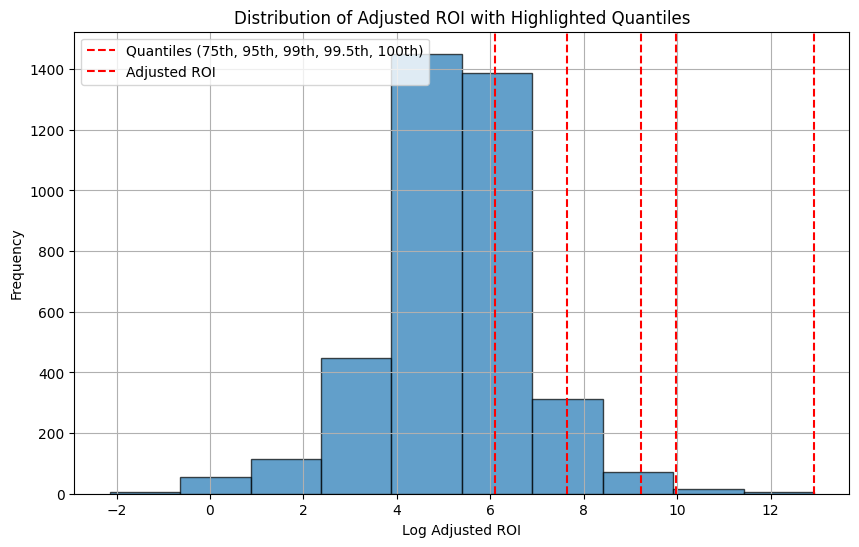

In [737]:
set_df = df.copy()
percentiles = df['adjusted_ROI'].quantile([0.75, 0.95, 0.99, 0.995, 1])
print(percentiles)

# let's see quantiles on the graph, but first let's apply log adjusted_ROI for better visualization and analysis

import numpy as np
set_df['log_adjusted_ROI'] = np.log1p(set_df['adjusted_ROI'])
log_quantiles = set_df['log_adjusted_ROI'].quantile([0.75, 0.95, 0.99, 0.995, 1])

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(set_df['log_adjusted_ROI'], bins=10, edgecolor='k', alpha=0.7)
for quantile in log_quantiles:
    plt.axvline(x=quantile, color='red', linestyle='--')
plt.xlabel('Log Adjusted ROI')
plt.ylabel('Frequency')
plt.title('Distribution of Adjusted ROI with Highlighted Quantiles')
plt.legend(['Quantiles (75th, 95th, 99th, 99.5th, 100th)', 'Adjusted ROI'])
plt.grid(True)
plt.show()


So you can see that outliers is somewhere between 99.5% and 100%. Let's see the list of the most profitable movies

In [738]:
quantile_99 = set_df['adjusted_ROI'].quantile(0.995)
max_value = set_df['adjusted_ROI'].max()  # This corresponds to the 100th percentile

count_between = set_df[(set_df['adjusted_ROI'] > quantile_99) & (set_df['adjusted_ROI'] <= max_value)].shape[0]

print(f'Number of values between 99th and 100th percentiles: {count_between}')

set_df[(set_df['adjusted_ROI'] > quantile_99) & (set_df['adjusted_ROI'] <= max_value)][['title', "adjusted_ROI"]].sort_values(by='adjusted_ROI', ascending=False)


Number of values between 99th and 100th percentiles: 29


,title,adjusted_ROI
2133,the blair witch project,414298.50
4429,deep throat,399900.00
1971,1 night in paris,178631.01
5281,smithereens,100789.25
3192,american adobo,99567.15
5068,paranormal activity,89832.93
2540,lady frankenstein,69741.50
1995,"aloha, bobby and rose",58233.33
653,pink flamingos,49900.00
990,open water,41952.27


I checked first 2 outliers - https://en.wikipedia.org/wiki/The_Blair_Witch_Project and https://en.wikipedia.org/wiki/Deep_Throat_(film) and they indeed have very high ROI so they look legit.

Additionaly, I googled 'good ROI in movie industry' so I got different answers, but most of them were "3x its budget". This rule suggests that for a movie to be considered financially successful, it should earn at least three times its production budget. This is because the production budget often only accounts for the costs of filming. There are many other expenses, like marketing, distribution, and operational costs, that are also incurred during a movie's release.

If you look at ROI distribution you also might notice that ROI=300 is almost 75th percentile.

Here's how we'll label the ROI based on the "3x its budget" rule to indicate whether a movie is a hit or a flop:

- **ROI < 300% (or 3x its budget): Flop**

If a movie's ROI is less than 300%, it means the revenue generated didn't cover the production budget and the additional expenses to a satisfactory extent. It's a sign of financial underperformance, and hence, we label it as a 'flop'.

- **ROI ≥ 300% (or 3x its budget): Hit**

Conversely, if a movie's ROI is 300% or higher, it suggests that the revenue generated was substantial, covering the production budget and the additional expenses, with a healthy profit margin. Therefore, we label it as a 'hit'.
Labeling movies in this manner will help us, and any potential investors or stakeholders, quickly identify the financial performance of movies in our dataset

In [739]:
def categorize_roi(roi):
    if roi < 300:
        return 'flop'
    else:
        return 'hit'

df['ROI_category'] = df['adjusted_ROI'].apply(categorize_roi)

label_mapping = {
    'flop': 0,
    'hit': 1
}
df['numerical_ROI_category'] = df['ROI_category'].map(label_mapping)

df.drop(['ROI_category', 'adjusted_boxoffice', 'adjusted_budget', 'adjusted_revenue'], axis=1, inplace=True)
#df.drop(['ROI_category', 'adjusted_ROI', 'adjusted_boxoffice', 'adjusted_budget', 'adjusted_revenue'], axis=1, inplace=True)

### Ratings

In [740]:
print(df[['tmdb_rating', 'tmdb_vote_count',  'imdb_rating', 'imdb_votes', 'rotten_tomatoes_rating', 'metacritic_rating']].info())
df[['tmdb_rating', 'tmdb_vote_count',  'imdb_rating', 'imdb_votes', 'rotten_tomatoes_rating', 'metacritic_rating']].describe()

<class 'pandas.core.frame.DataFrame'>
Index: 5735 entries, 0 to 6070
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tmdb_rating             5735 non-null   float64
 1   tmdb_vote_count         5735 non-null   int64  
 2   imdb_rating             5733 non-null   float64
 3   imdb_votes              5734 non-null   float64
 4   rotten_tomatoes_rating  5038 non-null   float64
 5   metacritic_rating       4474 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 313.6 KB
None


,tmdb_rating,tmdb_vote_count,imdb_rating,imdb_votes,rotten_tomatoes_rating,metacritic_rating
count,5735.00,5735.00,5733.00,5734.00,5038.00,4474.00
mean,63.42,1630.26,63.88,101832.58,56.17,55.43
std,9.09,2991.30,10.60,197990.83,27.96,18.36
min,0.00,0.00,17.00,13.00,0.00,1.00
25%,58.19,155.00,58.00,10261.50,33.00,42.00
50%,63.99,547.00,65.00,34851.00,59.00,56.00
75%,69.46,1685.00,71.00,106744.00,81.00,69.00
max,100.00,34612.00,93.00,2802199.00,100.00,100.00


/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


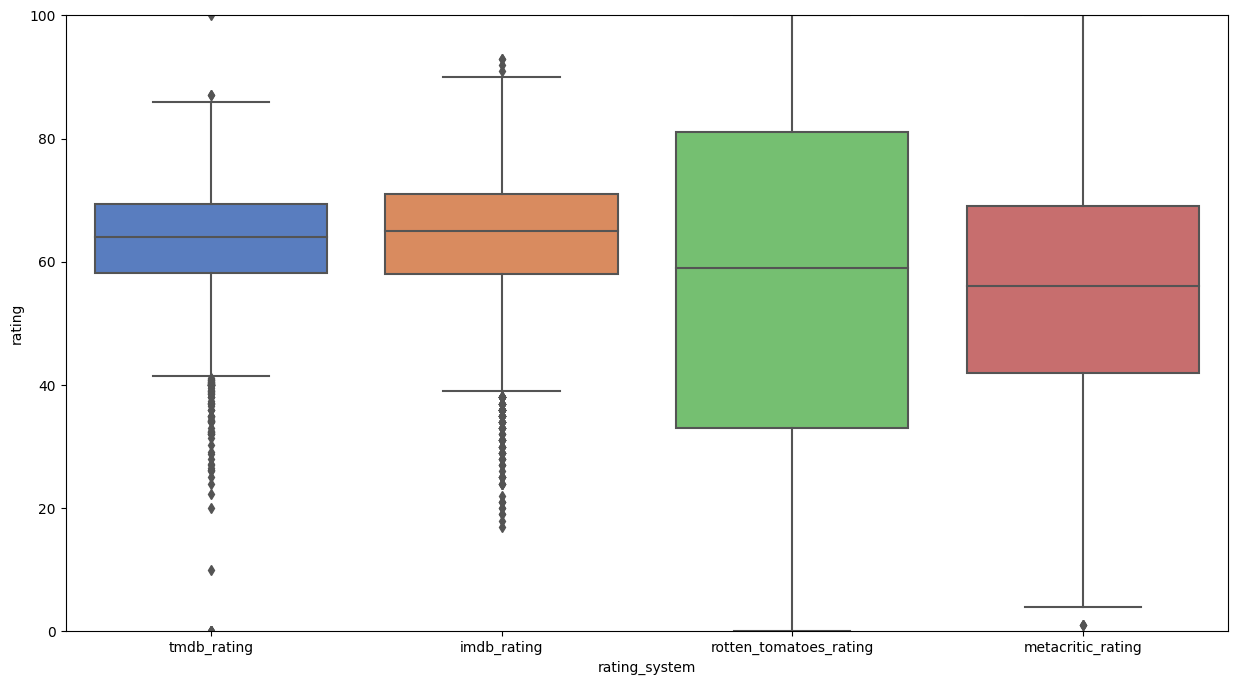

In [741]:
melted_df = df.melt(value_vars=['tmdb_rating', 'imdb_rating', 'rotten_tomatoes_rating', 'metacritic_rating'],
                    var_name='rating_system', value_name='rating')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
sns.boxplot(x='rating_system', y='rating', data=melted_df, palette="muted", ax=ax)
ax.set_ylim([0, 100])  

plt.show()

In [742]:
zero_counts = (df[['tmdb_rating', 'tmdb_vote_count',  'imdb_rating', 'imdb_votes', 'rotten_tomatoes_rating', 'metacritic_rating']] == 0).sum()

print(zero_counts)


tmdb_rating                7
tmdb_vote_count            7
imdb_rating                0
imdb_votes                 0
rotten_tomatoes_rating    63
metacritic_rating          0
dtype: int64


In our dataset, we have access to the number of votes a movie has received on both TMDB (tmdb_vote_count) and IMDb (imdb_votes). It's a well-observed phenomenon that the rating of a movie can significantly depend on the number of votes it has received; a movie with a higher number of votes is likely to have a more reliable rating as compared to a movie with fewer votes. This is because a larger voting pool reduces the chance of skewed ratings.

To account for this voting discrepancy and to provide a balanced view of a movie's rating, I will apply a Weighted Rating Formula. This formula not only considers the average rating of a movie but also the number of votes it has garnered. By doing so, it gives us a more conservative estimate of a movie’s rating, particularly when the movie has fewer votes. This weighted rating thus corrects the bias in rating due to a varied number of votes, offering a more accurate reflection of a movie's popularity and quality. 

**Adjusting Ratings based on Vote Counts:**

A weighted rating formula is often used to compute a score that reflects both the average rating of an item and the number of ratings the item has received. This helps to give a more balanced view of the item's popularity and quality, compared to simply using the average rating which can be easily skewed by a small number of high or low ratings.

One common formula used for this purpose is the IMDb (Internet Movie Database) weighted rating formula, which is as follows:

Weighted Rating(WR) = (v/(v+m))*R + (m/(v+m)) * C
where:

- v is the number of votes for the item,
- m is the minimum number of votes required for the item to be listed,
- R is the average rating of the item,
- C is the mean rating across the whole dataset.

the 70th percentile (0.70 quantile) is used to set a threshold for the minimum number of votes a movie must have to be included in the weighted rating calculation. This means that only movies with a number of votes higher than 70% of the movies in the dataset will have a weighted rating significantly influenced by their own average rating. For movies with a number of votes below this threshold, the global average rating will have a more significant influence on their weighted rating.

In [743]:
m = df['tmdb_vote_count'].quantile(0.70)  # minimum votes required to be listed
C = df['tmdb_rating'].mean()  # mean rating across the whole dataset

print('tmdb minimum votes:', m)
print('tmdb mean rating across the whole dataset:', C)

# Function to compute weighted rating
def weighted_rating(x, m=m, C=C):
    v = x['tmdb_vote_count']
    R = x['tmdb_rating']
    return (v / (v + m) * R) + (m / (m + v) * C)

df['weighted_tmdb_rating'] = df.apply(weighted_rating, axis=1)

m = df['imdb_votes'].quantile(0.70)  # minimum votes required to be listed
C = df['imdb_rating'].mean()  # mean rating across the whole dataset

print('imdb minimum votes:', m)
print('imdb mean rating across the whole dataset:', C)

# Function to compute weighted rating
def weighted_rating(x, m=m, C=C):
    v = x['imdb_votes']
    R = x['imdb_rating']
    return (v / (v + m) * R) + (m / (m + v) * C)

df['weighted_imdb_rating'] = df.apply(weighted_rating, axis=1)

print(df[['imdb_rating', 'imdb_votes', 'weighted_tmdb_rating',  'tmdb_vote_count',  'tmdb_rating','weighted_imdb_rating', 'rotten_tomatoes_rating',	'metacritic_rating']].describe())


tmdb minimum votes: 1350.0
tmdb mean rating across the whole dataset: 63.42423714036617
imdb minimum votes: 84894.8
imdb mean rating across the whole dataset: 63.881911739054594
       imdb_rating  imdb_votes  weighted_tmdb_rating  tmdb_vote_count  \
count      5733.00     5734.00               5735.00          5735.00   
mean         63.88   101832.58                 64.56          1630.26   
std          10.60   197990.83                  3.92          2991.30   
min          17.00       13.00                 43.19             0.00   
25%          58.00    10261.50                 62.77           155.00   
50%          65.00    34851.00                 63.47           547.00   
75%          71.00   106744.00                 65.39          1685.00   
max          93.00  2802199.00                 85.81         34612.00   

       tmdb_rating  weighted_imdb_rating  rotten_tomatoes_rating  \
count      5735.00               5733.00                 5038.00   
mean         63.42          

The weighted rating formula helps in balancing the ratings, especially for movies with a lower number of votes. Movies with fewer votes are pulled towards the mean rating to a greater extent than movies with a higher number of votes. This reduces the likelihood of extreme ratings for movies with few votes, making the distribution of ratings more balanced and less skewed. Movies with a higher vote count have ratings that are more reflective of the general audience's opinion, and their weighted ratings are less affected by the formula. 

By regressing ratings towards the mean, the formula reduces the influence of outlier ratings. This is particularly useful when there are movies with very high or very low ratings but with a small number of votes, which could otherwise distort the overall distribution.

/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


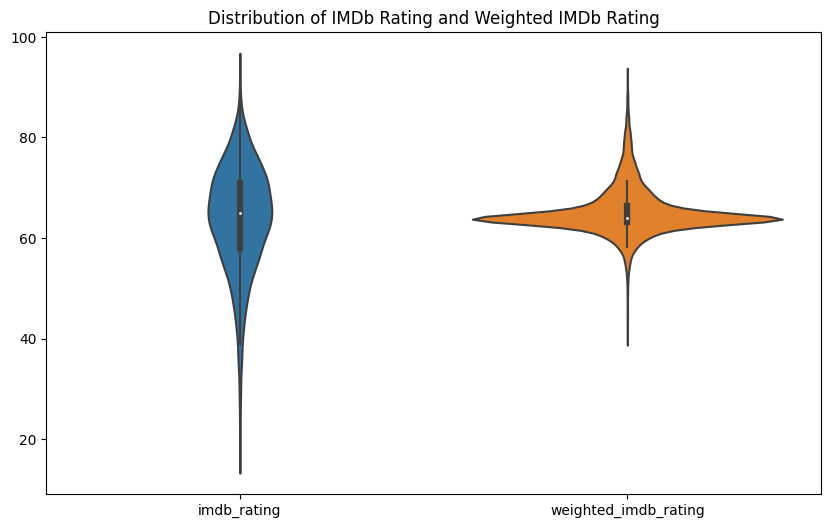

/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


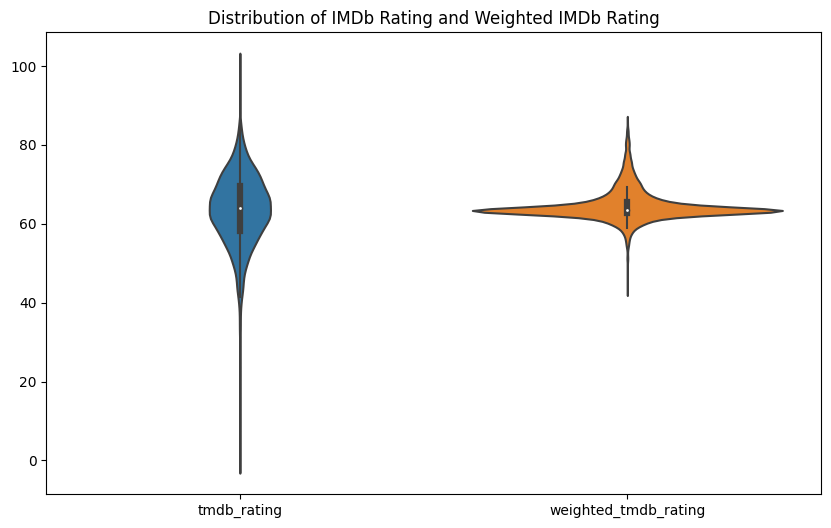

In [744]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['imdb_rating', 'weighted_imdb_rating']])
plt.title('Distribution of IMDb Rating and Weighted IMDb Rating')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['tmdb_rating', 'weighted_tmdb_rating']])
plt.title('Distribution of IMDb Rating and Weighted IMDb Rating')
plt.show()


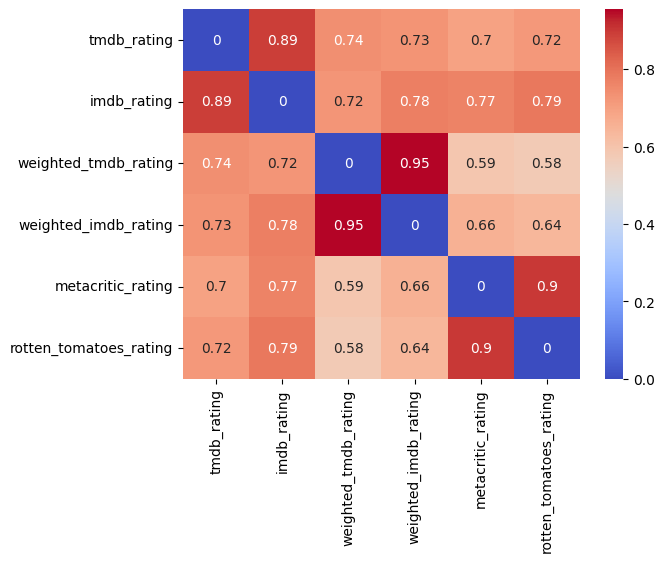

('weighted_tmdb_rating', 'weighted_imdb_rating')


In [745]:
corr_matrix = df[[ "tmdb_rating", 'imdb_rating', 
                             "weighted_tmdb_rating", 'weighted_imdb_rating', 
                             'metacritic_rating', 'rotten_tomatoes_rating']].corr()

# Compute the correlation matrix
for i in range(corr_matrix.shape[0]):
    corr_matrix.iloc[i, i] = 0

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

max_corr_value = corr_matrix.abs().max().max()
result = corr_matrix.where(corr_matrix == max_corr_value).stack().index.tolist()[0]

print(result)


The correlation coefficient of 0.96 between normalized_weighted_tmdb_rating and normalized_weighted_imdb_rating indicates a very strong positive linear relationship between these two variables. It makes sense to average them separately as they might be capturing similar aspects of the movie's quality.

Also in cases where weighted_imdb_rating is null, we can take only weighted_tmdb_rating number instead

In [746]:
import numpy as np

df['average_rating'] = np.where(df['weighted_imdb_rating'].isnull(), 
                                df['weighted_tmdb_rating'], 
                                (df['weighted_tmdb_rating'] + df['weighted_imdb_rating']) / 2)


# let's look at the top rates movies
top_movies = df.sort_values(by='average_rating', ascending=False)
top_movies[['title', 'average_rating']].head(15)


,title,average_rating
4595,the shawshank redemption,88.97
4570,the godfather,88.16
6032,the dark knight,86.72
6014,the lord of the rings: the return of the king,86.21
3912,schindler's list,86.18
4572,the godfather part ii,85.97
646,pulp fiction,85.93
952,forrest gump,85.40
2454,fight club,85.25
3317,inception,85.05


Currently for simplicity we aim to categorize movies into 'hit' or 'flop' based on their average ratings.
I chose a simplistic approach to label the top 25% of movies (in terms of average_rating) as 'hit', while the remaining 75% are labeled as 'flop'. This is a straightforward method to distinguish higher-rated movies from the lower-rated ones.

In [747]:
df['rating_category'] = 'flop' 
top_25_percentile_threshold = df['average_rating'].quantile(0.75)  
df.loc[df['average_rating'] >= top_25_percentile_threshold, 'rating_category'] = 'hit'  

label_mapping = {
    'flop': 0,
    'hit': 1
}
df['numerical_rating_category'] = df['rating_category'].map(label_mapping)
df.drop(['rating_category', 
                             'rotten_tomatoes_rating', 'metacritic_rating', 'imdb_rating', 'tmdb_rating',  
                             'weighted_imdb_rating', 'weighted_tmdb_rating', 'tmdb_vote_count', 'imdb_votes'], axis=1, inplace=True)


### Awards

In [748]:
df[['oscar_won',   'oscar_nominated', 'bafta_won', 'bafta_nominated', 'awards_won', 'awards_nominated']].describe()

,oscar_won,oscar_nominated,bafta_won,bafta_nominated,awards_won,awards_nominated
count,5735.00,5735.00,5735.00,5735.00,5735.00,5735.00
mean,0.17,0.25,0.01,0.03,5.64,10.02
std,0.81,0.86,0.11,0.22,14.43,19.93
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,1.00
50%,0.00,0.00,0.00,0.00,1.00,4.00
75%,0.00,0.00,0.00,0.00,5.00,10.00
max,11.00,11.00,4.00,5.00,245.00,337.00


In [749]:
# Top 10 movies by oscar_won
top10_oscar_won = df.nlargest(10, 'oscar_won')

# Top 10 movies by bafta_won
top10_bafta_won = df.nlargest(10, 'bafta_won')

# Top 10 movies by awards_won
top10_awards_won = df.nlargest(10, 'awards_won')

print("Top 10 movies by Oscar wins:")
print(top10_oscar_won[['title', 'oscar_won']])

print("\nTop 10 movies by BAFTA wins:")
print(top10_bafta_won[['title', 'bafta_won']])

print("\nTop 10 movies by Total awards won:")
print(top10_awards_won[['title', 'awards_won']])


Top 10 movies by Oscar wins:
                                              title  oscar_won
634                                         ben-hur         11
2489                                        titanic         11
6014  the lord of the rings: the return of the king         11
1391                                west side story         10
3078                                           gigi          9
3430                               the last emperor          9
3906                            the english patient          9
627                               on the waterfront          8
1716                                   my fair lady          8
1840                          from here to eternity          8

Top 10 movies by BAFTA wins:
                                        title  bafta_won
4435                         a bridge too far          4
2855                        strictly ballroom          3
188                      pink floyd: the wall          2
1156                

I referred to this link to gather some additional info on movie awards: https://www.imdb.com/title/<IMDB_ID>/awards/. The columns awards_won and awards_nominated obviously represent the total count of all awards won and nominated respectively.

For instance, if we consider 'The Lord of the Rings: The Return of the King' (link) or 'Titanic' (link), it's evident from the dataset that only the Oscars are mentioned. However, there's no mention of BAFTA awards, which might suggest that the dataset primarily highlights the most prestigious award(s) a movie has received.

Let's check my theory if we have for any movie oscar and bafta together:

In [750]:

titles_of_interest = ['titanic', 'the lord of the rings: the return of the king']
filtered_rows = df[df['title'].isin(titles_of_interest)]
print(filtered_rows[['oscar_won',   'oscar_nominated', 'bafta_won', 'bafta_nominated', 'awards_won', 'awards_nominated']])

non_empty_awards_rows = df[(df['oscar_won'].notnull() & df['oscar_won'] > 0) & (df['bafta_won'].notnull() & df['bafta_won'] > 0)]
print(non_empty_awards_rows)

      oscar_won  oscar_nominated  bafta_won  bafta_nominated  awards_won  \
1242          1                0          0                0           1   
2489         11                0          0                0         126   
6014         11                0          0                0         215   

      awards_nominated  
1242                 3  
2489                83  
6014               124  
Empty DataFrame
Columns: [title, release_year, release_month, original_language, spoken_languages, genres, production_companies, production_countries, runtime, rated, tagline, overview, plot, tmdb_popularity, cast, crew, collection, oscar_won, oscar_nominated, bafta_won, bafta_nominated, awards_won, awards_nominated, adjusted_ROI, numerical_ROI_category, average_rating, numerical_rating_category]
Index: []


We can create a Points System to combine these awards into one score. We'll give more points for winning awards and some extra points for nominations. Oscars will get the highest points, followed by BAFTA, and then other awards. We'll also take out the BAFTA and Oscar counts from the total awards number.

Points:

Oscar Win: 5 points
Oscar Nomination: 3 points
BAFTA Win: 4 points
BAFTA Nomination: 2 points
Other Award Win: 3 points
Other Award Nomination: 1 point"

In [751]:
df['award_points'] = (df['oscar_won'] * 5 + df['oscar_nominated'] * 3 +
                      df['bafta_won'] * 4 + df['bafta_nominated'] * 2 +
                      (df['awards_won'] - df['oscar_won'] - df['bafta_won']) * 3 + 
                      (df['awards_nominated'] - df['oscar_nominated'] - df['bafta_nominated']) * 1)

df[['award_points', 'oscar_won',   'oscar_nominated', 'bafta_won', 'bafta_nominated', 'awards_won', 'awards_nominated']]

,award_points,oscar_won,oscar_nominated,bafta_won,bafta_nominated,awards_won,awards_nominated
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,43,4,0,0,0,9,8
4,3,0,0,0,0,0,3
5,3,0,0,0,0,0,3
...,...,...,...,...,...,...,...
6065,17,0,0,0,0,3,8
6066,1,0,0,0,0,0,1
6067,6,0,0,0,0,2,0
6068,0,0,0,0,0,0,0


count   5735.00
mean      27.84
std       62.21
min        0.00
25%        2.00
50%        8.00
75%       26.00
max     1069.00
Name: award_points, dtype: float64


/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


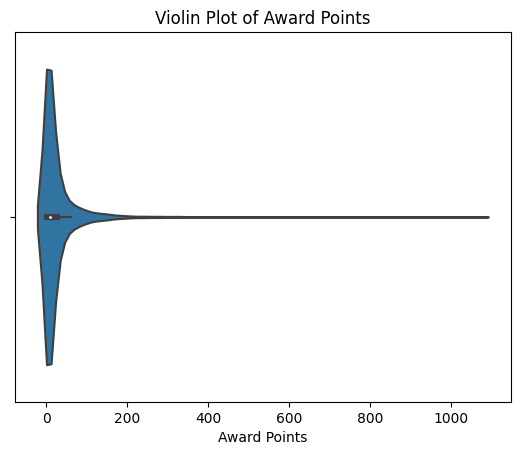

In [752]:
print(df['award_points'].describe())
sns.violinplot(x=df['award_points'])
plt.title('Violin Plot of Award Points')
plt.xlabel('Award Points')
plt.show()


the top 25% of the movies based on award points are labeled as 'hit' while the rest are labeled as 'flop'. This threshold is chosen to maintain consistency with the methodology applied to other metrics like ROI and average ratings. 

In [753]:
# Determine the 75th percentile value
threshold = df['award_points'].quantile(0.75)

df['award_category'] = ['hit' if x >= threshold else 'flop' for x in df['award_points']]

print(df[['award_points', 'award_category']].head())

label_mapping = {
    'flop': 0,
    'hit': 1
}
df['numerical_award_category'] = df['award_category'].map(label_mapping)
df.drop(['award_category', 'oscar_won',   'oscar_nominated', 'bafta_won', 'bafta_nominated', 'awards_won', 'awards_nominated'], axis=1, inplace=True)


   award_points award_category
0             0           flop
1             0           flop
2            43            hit
4             3           flop
5             3           flop


### Metrics correlation

Let's look at our metrics correlation

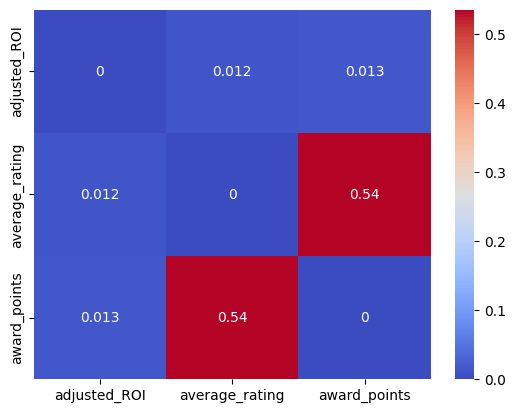

('average_rating', 'award_points')


In [754]:
corr_matrix = df[[ "adjusted_ROI", 'average_rating', 
                             "award_points"]].corr()

# Compute the correlation matrix
for i in range(corr_matrix.shape[0]):
    corr_matrix.iloc[i, i] = 0

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

max_corr_value = corr_matrix.abs().max().max()
result = corr_matrix.where(corr_matrix == max_corr_value).stack().index.tolist()[0]

print(result)

The correlation number between 'average_rating' and 'award_points' shows that there is a somewhat strong link between the average rating of a movie and the award points it gets. Basically, if a movie has a higher rating, it's somewhat more likely to have more award points too. This makes sense because good movies are often liked by viewers and also get awards.

But, a 0.55 number isn't super strong, so there are probably other things affecting award points that we're not seeing here. And just because two things are linked doesn't mean one causes the other.

there's pretty much no relationship between a movie's Return on Investment (ROI) and its average rating or award points. In other words, just because a movie makes more money (has a higher ROI), it doesn’t mean people will rate it higher or that it will win more awards. And vice versa, a well-rated movie or a movie with lots of awards doesn’t necessarily make more money.

The idea here is that a movie can be successful in many ways - it could make a lot of money, people could love it, or it could win a lot of awards. Our numbers are helping us see these different kinds of success and how they relate to each other.

Let's find the most successful movies in each category:

In [755]:
# Top 10 movies by adjusted_ROI
top10_ROI = df.nlargest(10, 'adjusted_ROI')

# Top 10 movies by average_rating
top10_rating = df.nlargest(10, 'average_rating')

# Top 10 movies by award_points
top10_awards_won = df.nlargest(10, 'award_points')

# To display the top 10 lists
print("Top 10 movies by ROI metric:")
print(top10_ROI[['title', 'adjusted_ROI']])

print("\nTop 10 movies by rating matric:")
print(top10_rating[['title', 'average_rating']])

print("\nTop 10 movies by award metric:")
print(top10_awards_won[['title', 'award_points']])


Top 10 movies by ROI metric:
                        title  adjusted_ROI
2133  the blair witch project     414298.50
4429              deep throat     399900.00
1971         1 night in paris     178631.01
5281              smithereens     100789.25
3192           american adobo      99567.15
5068      paranormal activity      89832.93
2540        lady frankenstein      69741.50
1995    aloha, bobby and rose      58233.33
653            pink flamingos      49900.00
990                open water      41952.27

Top 10 movies by rating matric:
                                              title  average_rating
4595                       the shawshank redemption           88.97
4570                                  the godfather           88.16
6032                                the dark knight           86.72
6014  the lord of the rings: the return of the king           86.21
3912                               schindler's list           86.18
4572                          the godfather pa

In [756]:
# Anti Top 10 movies by adjusted_ROI
top10_ROI = df.nsmallest(10, 'adjusted_ROI')

# Anti Top 10 movies by average_rating
top10_rating = df.nsmallest(10, 'average_rating')

# To display the top 10 lists
print("Anti Top 10 movies by ROI metric:")
print(top10_ROI[['title', 'adjusted_ROI']])

print("\n Anti Top 10 movies by rating matric:")
print(top10_rating[['title', 'average_rating']])


Anti Top 10 movies by ROI metric:
                                         title  adjusted_ROI
5879                                trojan war       -100.00
1603                             cross of iron       -100.00
1984                             the point men        -99.99
787   the goalie's anxiety at the penalty kick        -99.98
962                              walk on water        -99.97
5651                philadelphia experiment ii        -99.94
1522                                 fishtales        -99.93
3781                           the good doctor        -99.91
251                                    absolon        -99.91
3511                           janky promoters        -99.91

 Anti Top 10 movies by rating matric:
                     title  average_rating
4018  dragonball evolution           44.23
3984        disaster movie           45.42
3909        batman & robin           46.08
4869            epic movie           46.19
5423     meet the spartans           47.3

### Features

#### Original language

The most popular movie original language in the dataset is english.

In [757]:
english_others_ratio = (len(df[df['original_language'] =='en']) / len(df)) * 100
print(f"The ratio of English to non-English movies is: {english_others_ratio:.2f}%")

df['original_language'].value_counts()

The ratio of English to non-English movies is: 86.57%


original_language
en    4965
fr     127
hi     110
ja      75
ru      68
es      53
ta      53
de      38
it      38
ko      30
cn      29
zh      26
sv      15
pt      13
nl      12
tr      10
no       7
th       7
ml       5
te       5
he       5
da       5
el       4
pl       4
sr       3
ro       3
ms       3
hu       3
fi       3
cs       2
ar       2
vi       2
ca       1
nb       1
gl       1
tl       1
et       1
tn       1
km       1
iu       1
kn       1
fa       1
Name: count, dtype: int64

Let's compare success metrics for non-english and english movies

In [758]:
df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)
grouped = df.groupby('is_english')
print("median", grouped[['adjusted_ROI', 'average_rating', 'award_points']].median())
grouped[['adjusted_ROI', 'average_rating', 'award_points']].describe()

median             adjusted_ROI  average_rating  award_points
is_english                                            
0                  59.37           63.91         12.00
1                  87.15           63.70          8.00


adjusted_ROI                                                       \
                  count   mean     std     min    25%   50%    75%       max   
is_english                                                                     
0                770.00 800.10 6035.91  -99.98 -39.83 59.37 309.40 100789.25   
1               4965.00 625.71 8871.83 -100.00 -31.71 87.15 291.89 414298.50   

           average_rating                                           \
                    count  mean  std   min   25%   50%   75%   max   
is_english                                                           
0                  770.00 65.29 3.51 58.31 63.57 63.91 65.46 83.74   
1                 4965.00 64.79 4.32 44.23 62.77 63.70 65.97 88.97   

           award_points                                            
                  count  mean   std  min  25%   50%   75%     max  
is_english                                                         
0                770.00 34.15 59.03 0.00 2.00 12.00 40.00  700.00  
1               4965.00 26.87 62.64 0.00 2.00  8.00 24.00 1069.00

**ROI**

Both English and non-English movies have a wide range of ROI values, as evidenced by the large standard deviations and the vast difference between the minimum and maximum values. The median ROI is higher for English movies compared to non-English movies, suggesting that the typical English movie has a higher ROI.

**Average Rating**

Non-English movies have a slightly higher mean and median rating compared to English movies. The range of ratings is broader for English movies. The median rating is also higher for non-English movies, indicating that non-English movies tend to receive slightly higher ratings on average.

**Award Points**

Non-English movies are associated with a bit higher mean and median number of award points, indicating a possible higher level of award recognition for non-English movies in this dataset.

#### Title, overview, tagline and plot

For those features I'm going to use TfidfVectorizer with decomposition and sentiment analysis:

In [ ]:
#!TODO: frequent words, word clouds, etc

In [759]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_title = vectorizer.fit_transform(df['title'])
tfidf_overview = vectorizer.fit_transform(df['overview'])
tfidf_tagline = vectorizer.fit_transform(df['tagline'])
tfidf_plot = vectorizer.fit_transform(df['plot'])

from sklearn.decomposition import TruncatedSVD

# Create TruncatedSVD instance
svd = TruncatedSVD(n_components=1)

# Reduce dimensionality
reduced_title = svd.fit_transform(tfidf_title)
reduced_overview = svd.fit_transform(tfidf_overview)
reduced_tagline = svd.fit_transform(tfidf_tagline)
reduced_plot = svd.fit_transform(tfidf_plot)

df['title_vector'] = reduced_title
df['overview_vector'] = reduced_overview
df['tagline_vector'] = reduced_tagline
df['plot_vector'] = reduced_plot


from textblob import TextBlob
df['overview_sentiment'] = df['overview'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['title_sentiment'] = df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['tagline_sentiment'] = df['tagline'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['plot_sentiment'] = df['plot'].apply(lambda x: TextBlob(x).sentiment.polarity)

df = df.drop(['overview', 'tagline', 'plot'], axis=1)

#### Year/month

/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages

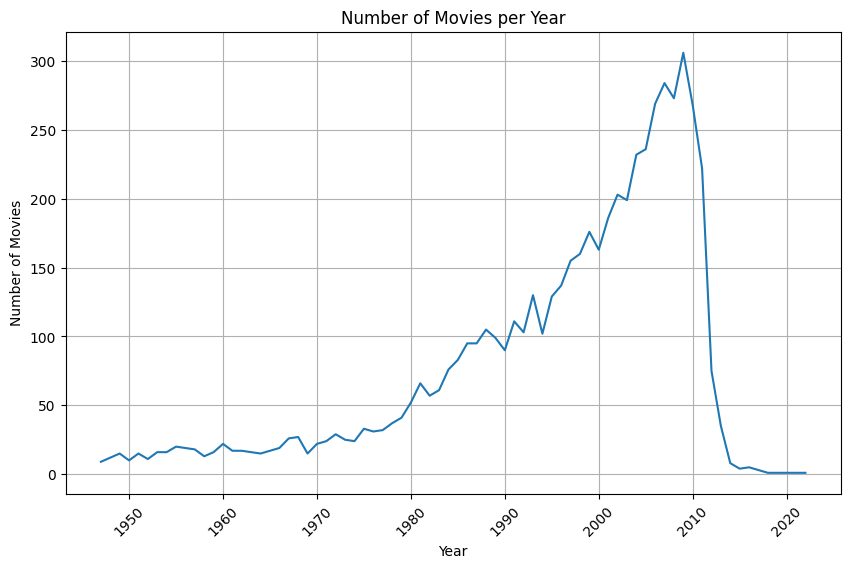

In [760]:
# Get the count of movies per year
movies_per_year = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=movies_per_year)
plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

In our dataset, each movie has a release year associated with it. However, looking at individual years can be a bit overwhelming, and might not provide a clear picture of trends over time. This is because the movie industry has evolved over decades, and the circumstances surrounding movie production, distribution, and reception can vary greatly from one decade to another.

To make our analysis more insightful and easier to interpret, we've created a new column named era. This column categorizes movies into distinct time periods, specifically decades, such as '1940-1950', '1950-1960', and so on. By doing this, we aim to simplify our dataset and potentially uncover trends or patterns that occur over these broader time periods rather than on a year-by-year basis.

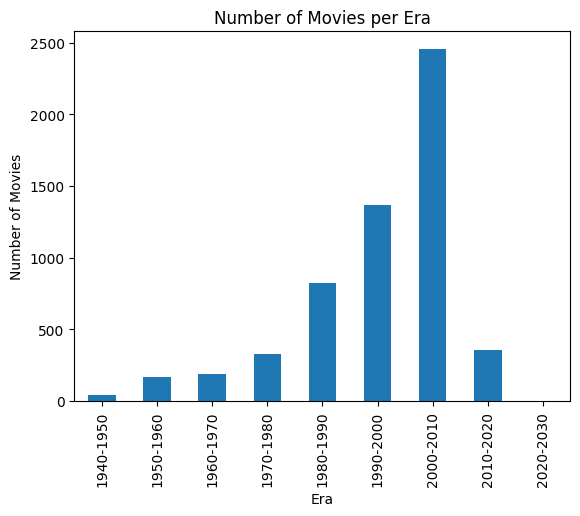

In [761]:
bins = [1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
labels = ['1940-1950', '1950-1960', '1960-1970', '1970-1980', '1980-1990','1990-2000', '2000-2010', '2010-2020', '2020-2030']

df['era'] = pd.cut(df['release_year'], bins=bins, labels=labels, include_lowest=True)

era_counts = df['era'].value_counts().sort_index()

era_counts.plot(kind='bar')

plt.title('Number of Movies per Era')
plt.xlabel('Era')
plt.ylabel('Number of Movies')

plt.show()


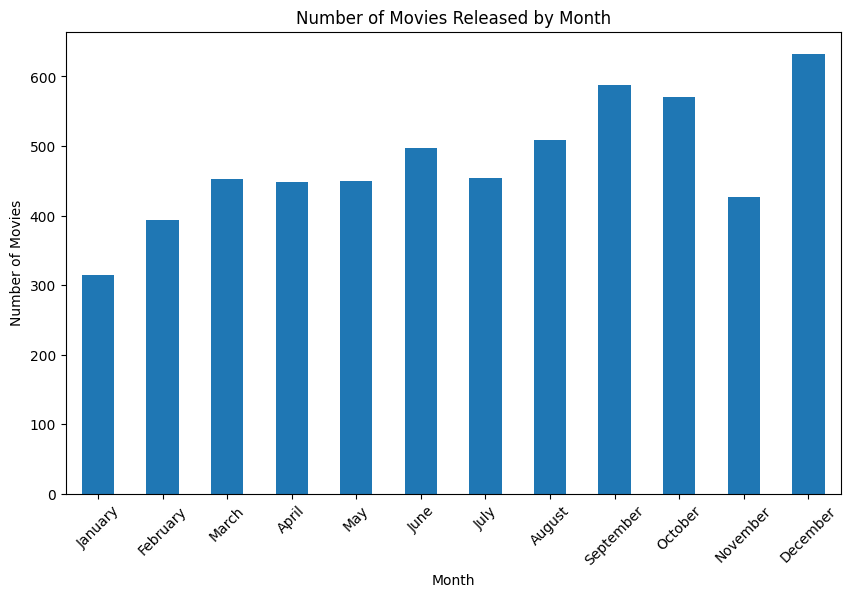

In [762]:
month_counts = df['release_month'].value_counts().sort_index()
month_counts.plot(kind='bar', figsize=(10,6))

plt.title('Number of Movies Released by Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(ticks=range(12), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.show()

In [763]:
df.columns

Index(['title', 'release_year', 'release_month', 'original_language',
       'spoken_languages', 'genres', 'production_companies',
       'production_countries', 'runtime', 'rated', 'tmdb_popularity', 'cast',
       'crew', 'collection', 'adjusted_ROI', 'numerical_ROI_category',
       'average_rating', 'numerical_rating_category', 'award_points',
       'numerical_award_category', 'is_english', 'title_vector',
       'overview_vector', 'tagline_vector', 'plot_vector',
       'overview_sentiment', 'title_sentiment', 'tagline_sentiment',
       'plot_sentiment', 'era'],
      dtype='object')

/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_

<Axes: title={'center': 'Awards points by the Month for hit award_points'}, xlabel='mon', ylabel='award_points'>

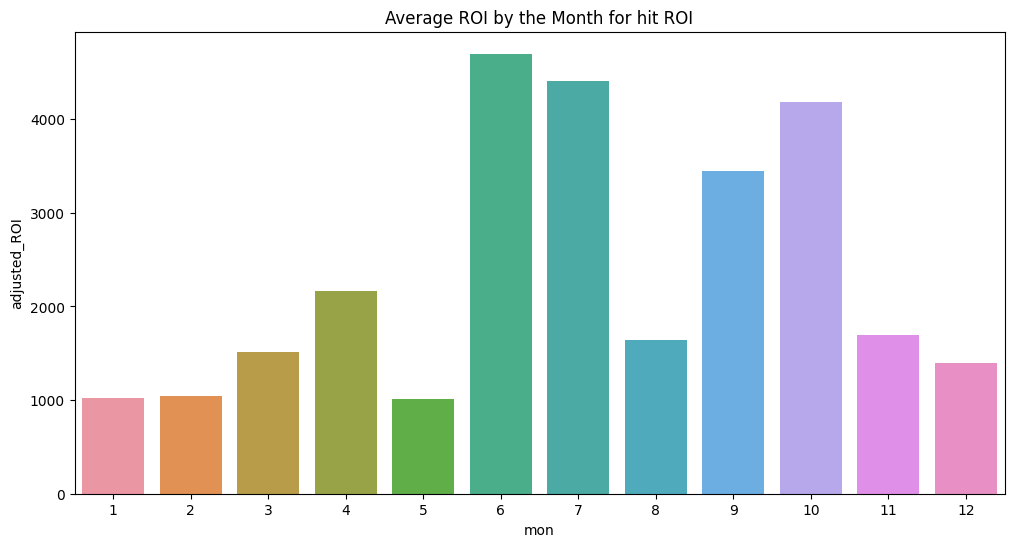

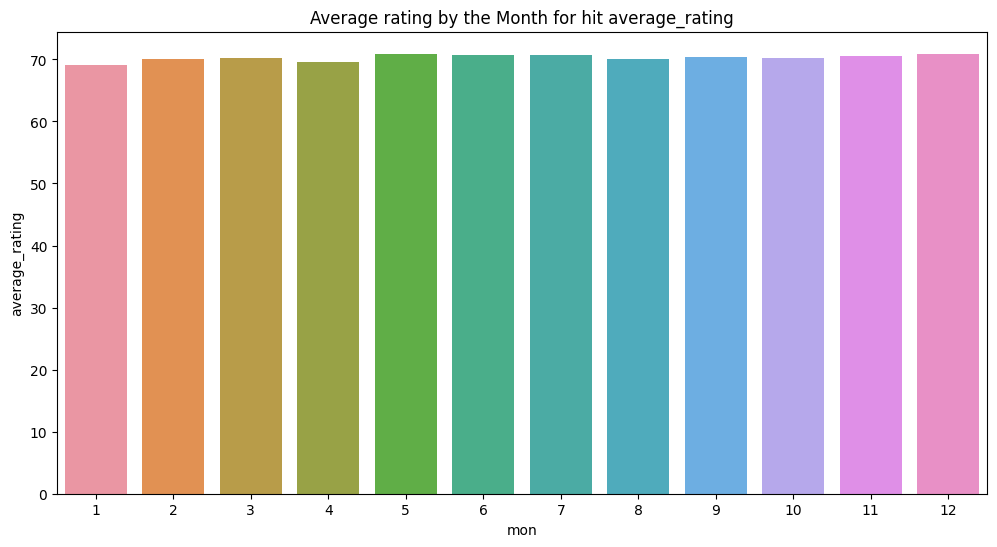

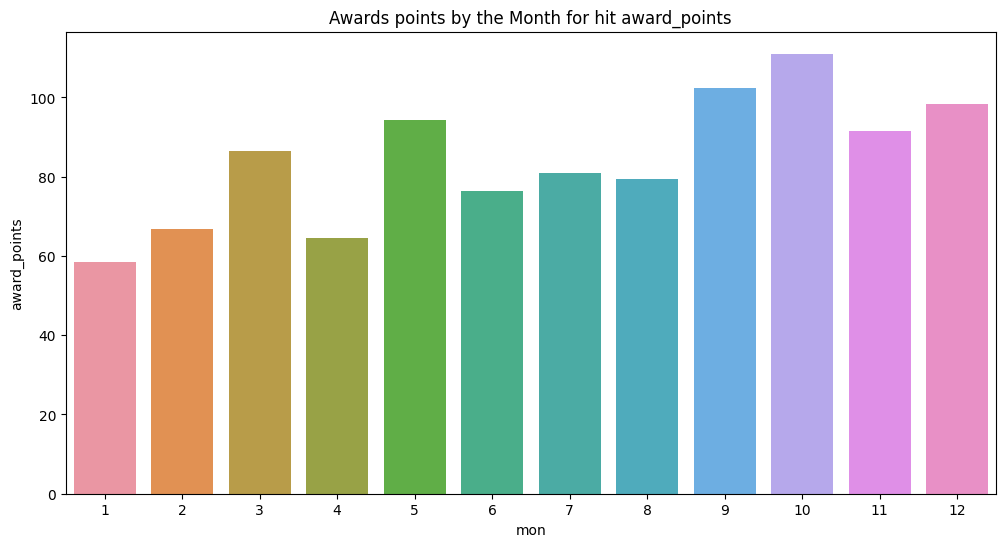

In [764]:
month_mean_hit = pd.DataFrame(df[df['numerical_ROI_category'] == 1].groupby('release_month')['adjusted_ROI'].mean())
month_mean_hit['mon'] = month_mean_hit.index
plt.figure(figsize=(12,6))
plt.title("Average ROI by the Month for hit ROI")
sns.barplot(x='mon', y='adjusted_ROI', data=month_mean_hit)

month_mean_hit = pd.DataFrame(df[df['numerical_rating_category'] == 1].groupby('release_month')['average_rating'].mean())
month_mean_hit['mon'] = month_mean_hit.index
plt.figure(figsize=(12,6))
plt.title("Average rating by the Month for hit average_rating")
sns.barplot(x='mon', y='average_rating', data=month_mean_hit)

month_mean_hit = pd.DataFrame(df[df['numerical_award_category'] == 1].groupby('release_month')['award_points'].mean())
month_mean_hit['mon'] = month_mean_hit.index
plt.figure(figsize=(12,6))
plt.title("Awards points by the Month for hit award_points")
sns.barplot(x='mon', y='award_points', data=month_mean_hit)

We observe a trend of higher ROI during the summer. A notable number of awarded movies were released in September and October, aligning with the typical release period for Oscar-nominated movies as per The Ringer (https://www.theringer.com/oscars/2018/2/28/17060396/best-oscar-movie-release-date). The analysis shows a shift in the ideal release date to October and November, with these months hosting 60.4% of Big Four winners since 2005, compared to only 25% from 1986 through 2005. Interestingly, the release month doesn't seem to affect the average rating of the movies

In [765]:
df['is_summer'] = df['release_month'].apply(lambda x: 1 if x in ['6', '7'] else 0)
df['is_autumn'] = df['release_month'].apply(lambda x: 1 if x in ['9', '10', '11'] else 0)

In [766]:
df.columns

Index(['title', 'release_year', 'release_month', 'original_language',
       'spoken_languages', 'genres', 'production_companies',
       'production_countries', 'runtime', 'rated', 'tmdb_popularity', 'cast',
       'crew', 'collection', 'adjusted_ROI', 'numerical_ROI_category',
       'average_rating', 'numerical_rating_category', 'award_points',
       'numerical_award_category', 'is_english', 'title_vector',
       'overview_vector', 'tagline_vector', 'plot_vector',
       'overview_sentiment', 'title_sentiment', 'tagline_sentiment',
       'plot_sentiment', 'era', 'is_summer', 'is_autumn'],
      dtype='object')

#### Genres

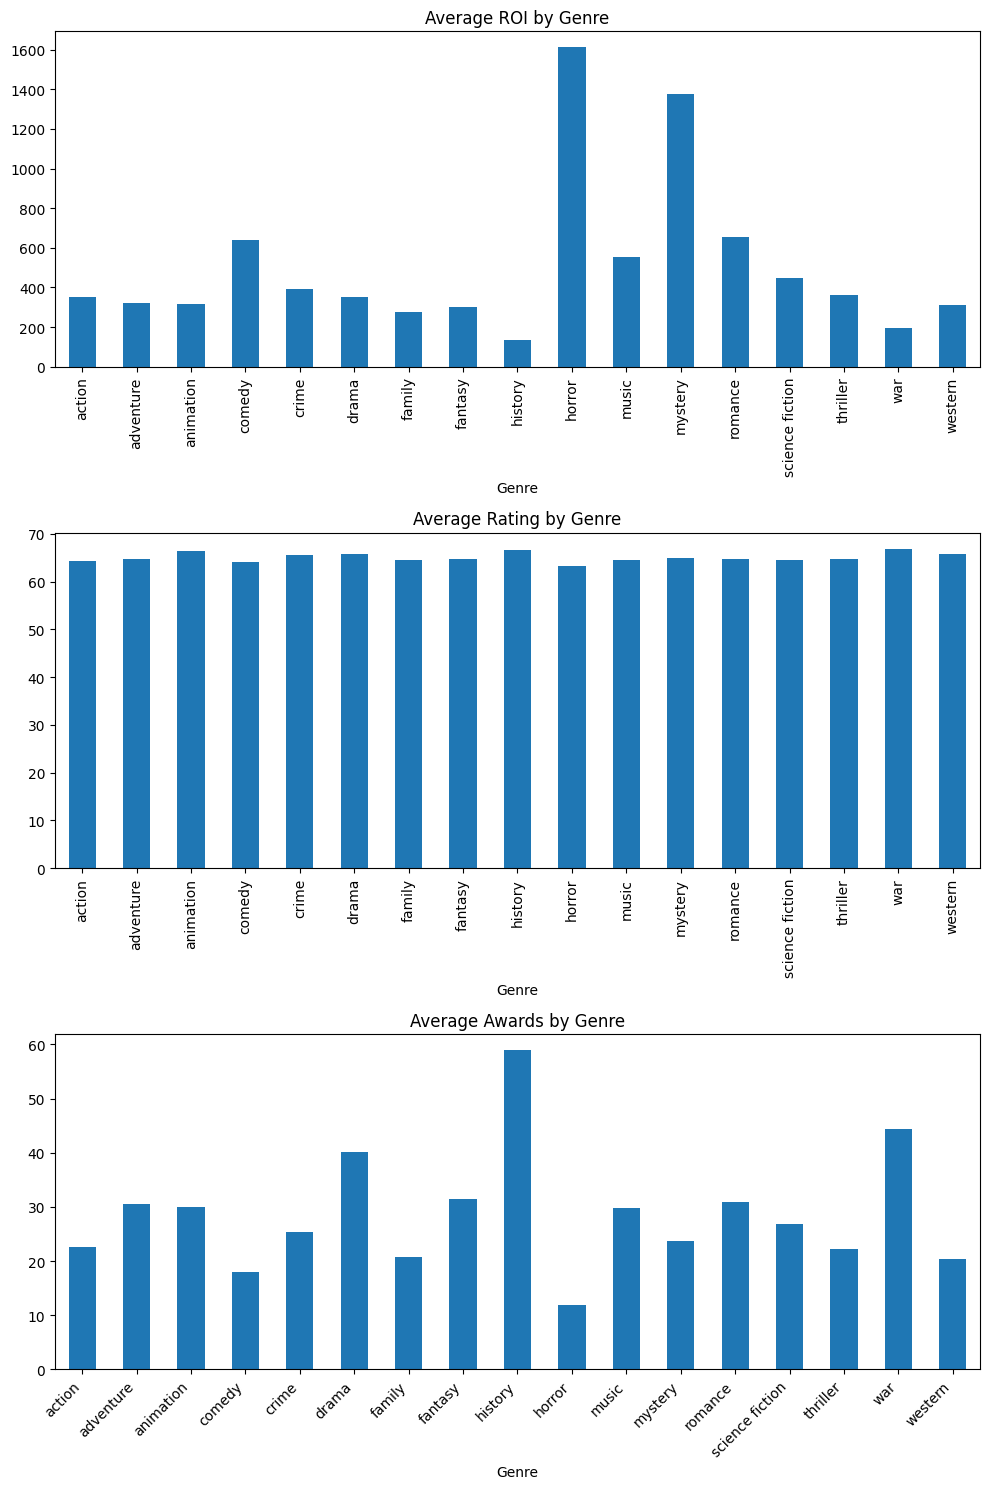

In [767]:
df['genres_list'] = df['genres'].str.split(',')

genres_dict = {'ROI': [], 'Rating': [], 'Awards': [], 'Genre': []}

for index, row in df.iterrows():
    for genre in row['genres_list']:
        genres_dict['Genre'].append(genre)
        genres_dict['ROI'].append(row['adjusted_ROI'])
        genres_dict['Rating'].append(row['average_rating'])
        genres_dict['Awards'].append(row['award_points'])

genres_df = pd.DataFrame(genres_dict)

genre_means = genres_df.groupby('Genre').mean()

fig, axs = plt.subplots(3, figsize=(10,15))

genre_means['ROI'].plot(kind='bar', ax=axs[0], title='Average ROI by Genre')
genre_means['Rating'].plot(kind='bar', ax=axs[1], title='Average Rating by Genre')
genre_means['Awards'].plot(kind='bar', ax=axs[2], title='Average Awards by Genre')

plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()


Based on the analysis, it's evident that genres do impact the movie's performance in different metrics. Specifically, horror and mystery genres tend to yield higher average ROI, indicating they might be more profitable. On the other hand, the average rating remains consistent across all genres, suggesting that genre doesn't significantly affect the audience's perceived quality. However, when it comes to awards, history, war, and drama genres are more likely to receive recognition, likely due to their often profound and thought-provoking narratives. 

Let's overview genres in our hit movies:

In [768]:
df.columns

Index(['title', 'release_year', 'release_month', 'original_language',
       'spoken_languages', 'genres', 'production_companies',
       'production_countries', 'runtime', 'rated', 'tmdb_popularity', 'cast',
       'crew', 'collection', 'adjusted_ROI', 'numerical_ROI_category',
       'average_rating', 'numerical_rating_category', 'award_points',
       'numerical_award_category', 'is_english', 'title_vector',
       'overview_vector', 'tagline_vector', 'plot_vector',
       'overview_sentiment', 'title_sentiment', 'tagline_sentiment',
       'plot_sentiment', 'era', 'is_summer', 'is_autumn', 'genres_list'],
      dtype='object')

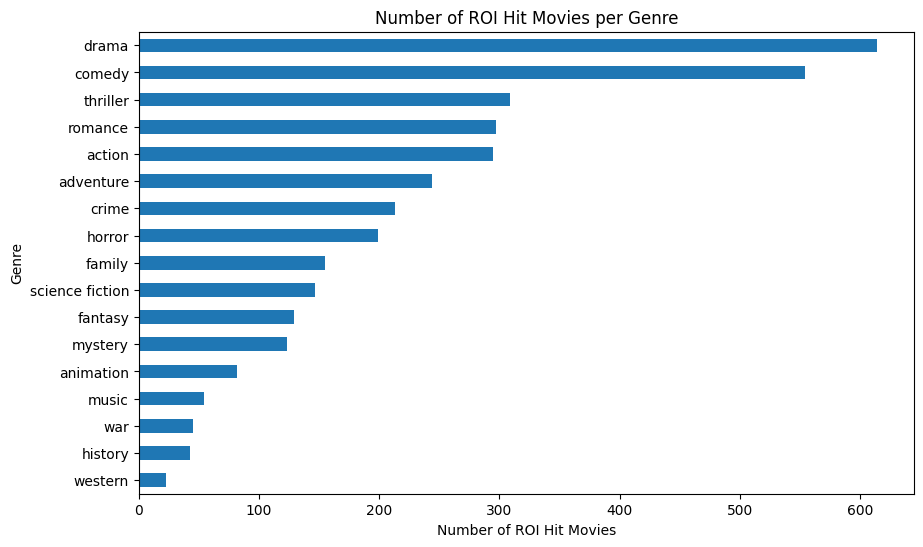

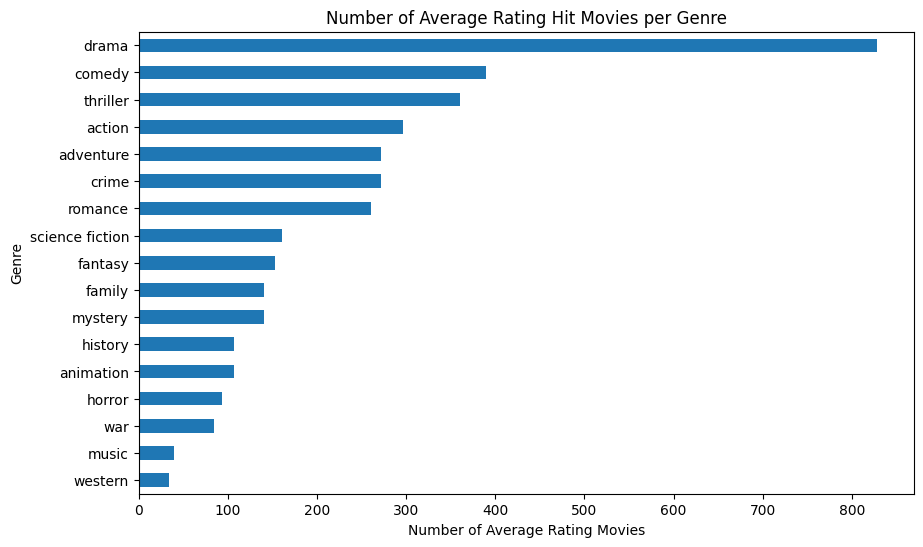

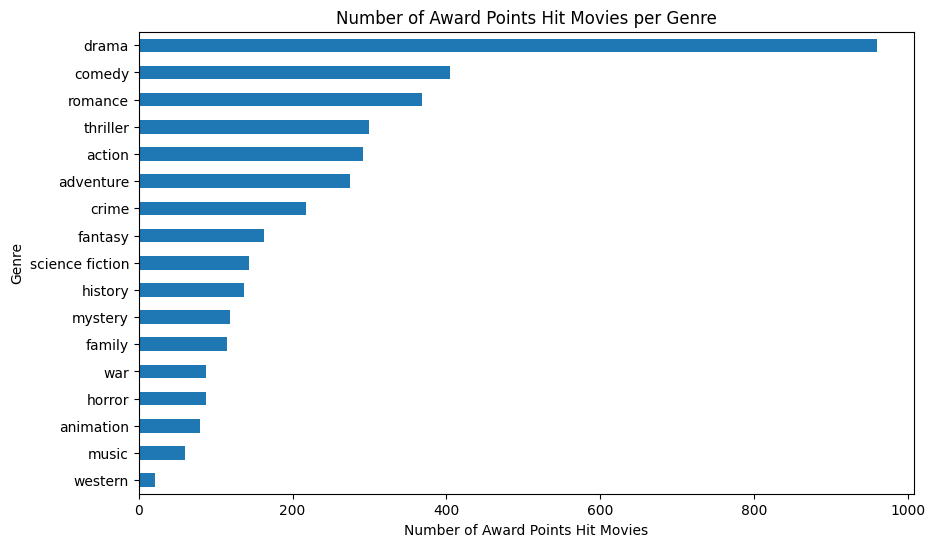

In [769]:
genres_expanded = df.explode('genres_list')

hit_movies_ROI = genres_expanded[genres_expanded['numerical_ROI_category'] == 1]
hit_movies_count_ROI = hit_movies_ROI['genres_list'].value_counts()

hit_movies_count_ROI.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Number of ROI Hit Movies per Genre')
plt.xlabel('Number of ROI Hit Movies')
plt.ylabel('Genre')
plt.show()

hit_movies_rating = genres_expanded[genres_expanded['numerical_rating_category'] == 1]
hit_movies_count_rating = hit_movies_rating['genres_list'].value_counts()

hit_movies_count_rating.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Number of Average Rating Hit Movies per Genre')
plt.xlabel('Number of Average Rating Movies')
plt.ylabel('Genre')
plt.show()

hit_movies_award = genres_expanded[genres_expanded['numerical_award_category'] == 1]
hit_movies_count_award = hit_movies_award['genres_list'].value_counts()

hit_movies_count_award.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Number of Award Points Hit Movies per Genre')
plt.xlabel('Number of Award Points Hit Movies')
plt.ylabel('Genre')
plt.show()




As observed, drama, comedy, and romance emerge as the most prevalent genres across each metric. Let's create dummies from this column

In [770]:
genre_dummies = df['genres'].str.get_dummies(sep=',')
df = pd.concat([df, genre_dummies], axis=1)
df

,title,release_year,release_month,original_language,spoken_languages,genres,production_companies,production_countries,runtime,rated,tmdb_popularity,cast,crew,collection,adjusted_ROI,numerical_ROI_category,average_rating,numerical_rating_category,award_points,numerical_award_category,is_english,title_vector,overview_vector,tagline_vector,plot_vector,overview_sentiment,title_sentiment,tagline_sentiment,plot_sentiment,era,is_summer,is_autumn,genres_list,action,adventure,animation,comedy,crime,drama,family,fantasy,history,horror,music,mystery,romance,science fiction,thriller,war,western
0,the pit and the pendulum,1961,8,en,en,"horror,mystery","alta vista productions,american international ...",us,81,unrated,9.49,"[{'name': 'vincent price', 'popularity': 15.23...","[{'job': 'director', 'name': 'roger corman', '...",False,900.00,1,64.56,0,0,0,1,0.34,0.18,0.01,0.20,-0.20,0.00,0.00,-0.20,1960-1970,0,0,"[horror, mystery]",0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,universal soldier: regeneration,2009,10,en,"bg,en","adventure,action,science fiction,thriller","foresight unlimited,signature entertainment,ba...",us,97,r,15.84,"[{'name': 'jean-claude van damme', 'popularity...","[{'job': 'executive producer', 'name': 'mark d...",True,-93.75,0,61.51,0,0,0,1,0.00,0.12,0.08,0.12,0.09,0.00,0.00,0.00,2000-2010,0,0,"[adventure, action, science fiction, thriller]",1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,the heiress,1949,10,en,en,"drama,romance,history",paramount,us,115,unrated,6.43,"[{'name': 'olivia de havilland', 'popularity':...","[{'job': 'costume design', 'name': 'edith head...",False,-11.54,0,66.01,1,43,1,1,0.22,0.14,0.02,0.14,0.07,0.00,0.80,0.07,1940-1950,0,0,"[drama, romance, history]",0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
4,problem child 2,1991,7,en,"es,en","comedy,family","imagine entertainment,universal pictures",us,90,pg-13,16.09,"[{'name': 'john ritter', 'popularity': 17.473}...","[{'job': 'writer', 'name': 'scott alexander', ...",True,118.03,0,61.15,0,3,0,1,0.00,0.14,0.07,0.19,-0.23,0.00,-0.55,-0.48,1990-2000,0,0,"[comedy, family]",0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,fame,2009,9,en,en,"music,comedy,drama,romance","united artists,lakeshore entertainment,metro-g...",us,107,pg,13.26,"[{'name': 'kay panabaker', 'popularity': 4.742...","[{'job': 'producer', 'name': 'tom rosenberg', ...",False,328.95,1,61.85,0,3,0,1,-0.00,0.17,0.00,0.21,0.07,0.00,0.00,0.10,2000-2010,0,0,"[music, comedy, drama, romance]",0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6065,star trek: insurrection,1998,12,en,en,"science fiction,action,adventure,thriller","paramount,digital image associates",us,102,pg,25.13,"[{'name': 'patrick stewart', 'popularity': 33....","[{'job': 'set decoration', 'name': 'john m. dw...",True,68.57,0,63.85,0,17,0,1,0.01,0.21,0.15,0.17,-0.02,0.00,0.00,0.19,1990-2000,0,0,"[science fiction, action, adventure, thriller]",1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
6066,i'm gonna git you sucka,1988,11,en,en,"comedy,action,crime","ivory way productions,front films,raymond katz...",us,88,r,7.17,"[{'name': 'keenen ivory wayans', 'popularity':...","[{'job': 'wardrobe assistant', 'name': 'nancy ...",False,333.33,1,63.82,0,1,0,1,0.00,0.18,0.14,0.14,-0.06,0.00,-0.28,-0.08,1980-1990,0,0,"[comedy, action, crime]",1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
6067,die geschichte vom brandner kaspar,2008,10,de,de,"comedy,drama","clasart film,tele münchen fernseh produktionsg...",de,105,unrated,3.93,"[{'name': 'franz xaver kroetz', 'popularity': ...","[{'job': 'cinematography', 'name': 'jörg widme...",False,72.46,0,63.69,0,6,0,0,0.00,0.19,0.00,0.21,0.15,0.00,0.00,0.15,2000-2010,0,0,"[comedy, drama]",0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
6068,agent cody banks 2: destination london,2004,3,en,en,"comedy,action,adventure,family,romance","maverick films,dylan sellers productions,splen...",us,100,pg,19.80,"[{'name

#### Rated

/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_

<Axes: title={'center': 'Awards points by the MPA Rating for hit award_points'}, xlabel='rated', ylabel='award_points'>

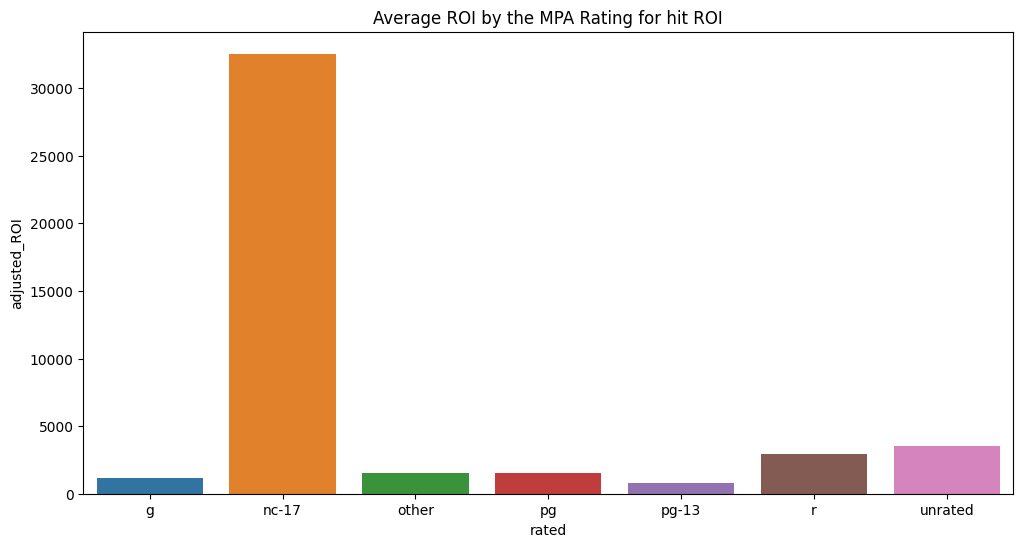

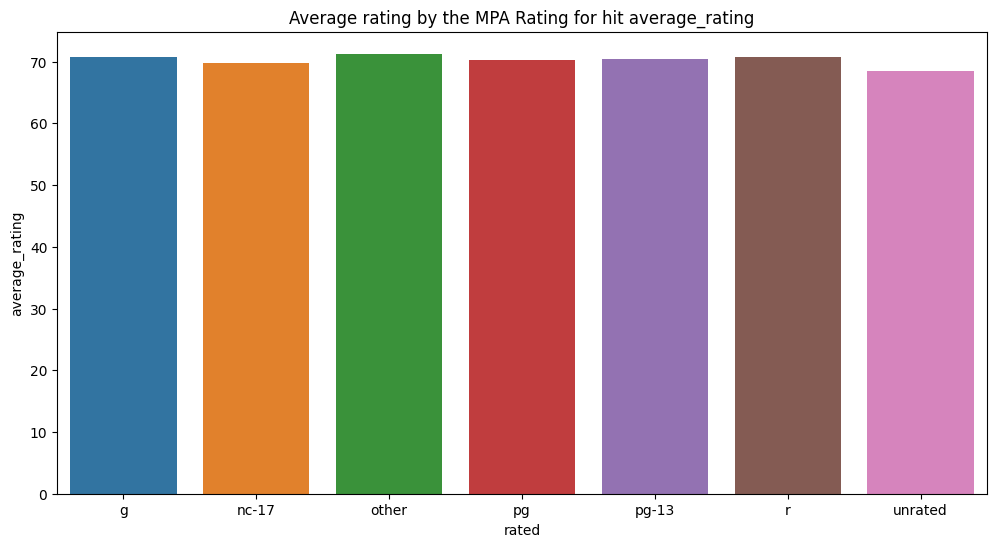

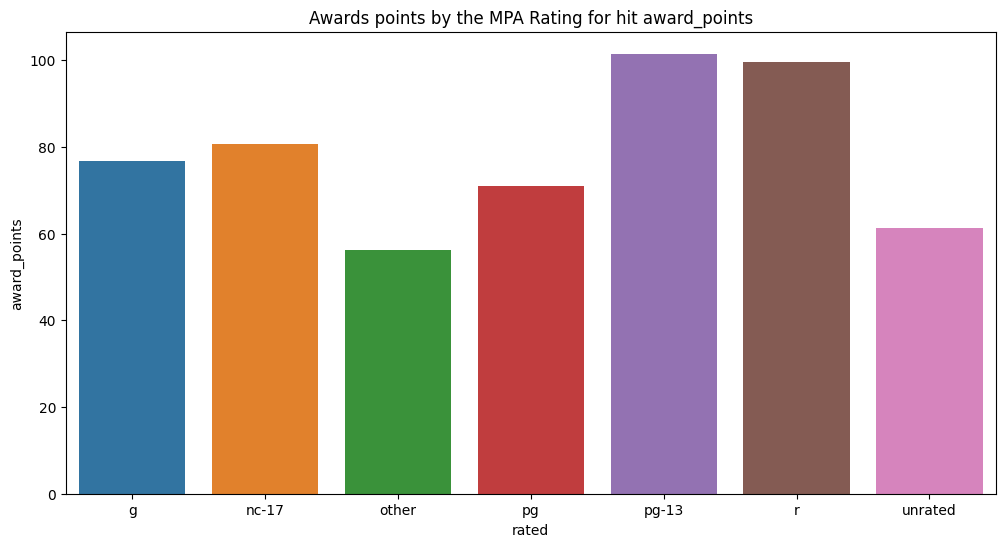

In [771]:
rated_mean_hit = pd.DataFrame(df[df['numerical_ROI_category'] == 1].groupby('rated')['adjusted_ROI'].mean())
rated_mean_hit['rated'] = rated_mean_hit.index
plt.figure(figsize=(12,6))
plt.title("Average ROI by the MPA Rating for hit ROI")
sns.barplot(x='rated', y='adjusted_ROI', data=rated_mean_hit)

rated_mean_hit = pd.DataFrame(df[df['numerical_rating_category'] == 1].groupby('rated')['average_rating'].mean())
rated_mean_hit['rated'] = rated_mean_hit.index
plt.figure(figsize=(12,6))
plt.title("Average rating by the MPA Rating for hit average_rating")
sns.barplot(x='rated', y='average_rating', data=rated_mean_hit)

rated_mean_hit = pd.DataFrame(df[df['numerical_award_category'] == 1].groupby('rated')['award_points'].mean())
rated_mean_hit['rated'] = rated_mean_hit.index
plt.figure(figsize=(12,6))
plt.title("Awards points by the MPA Rating for hit award_points")
sns.barplot(x='rated', y='award_points', data=rated_mean_hit)

Movies rated NC-17 make more money on average, but they don't get better ratings. On the other hand, movies rated R and PG-13 get more awards. So, while NC-17 movies might be good for making money, R and PG-13 movies are better if you're looking for awards.



#### List colums: spoken_languages, genres, production_companies, production_countries



In [772]:
production_c_df = df.copy()
production_c_df['production_countries'] = production_c_df['production_countries'].str.split(',')
genre_counter = Counter(genre for genre_list in production_c_df['production_countries'].dropna() for genre in genre_list)
genre_frequencies = pd.DataFrame(genre_counter.items(), columns=['production_countries', 'frequency'])

genre_frequencies = genre_frequencies.sort_values(by='frequency', ascending=False).reset_index(drop=True)
genre_frequencies

,production_countries,frequency
0,us,4635
1,gb,730
2,fr,417
3,de,378
4,ca,260
...,...,...
84,kz,1
85,by,1
86,mk,1
87,mo,1


The majority of movies in the dataset are produced in the US

In [773]:
production_c_df = df.copy()
production_c_df['production_companies'] = production_c_df['production_companies'].str.split(',')
genre_counter = Counter(genre for genre_list in production_c_df['production_companies'].dropna() for genre in genre_list)
genre_frequencies = pd.DataFrame(genre_counter.items(), columns=['production_companies', 'frequency'])

genre_frequencies = genre_frequencies.sort_values(by='frequency', ascending=False).reset_index(drop=True)
genre_frequencies.head(10)


,production_companies,frequency
0,warner bros. pictures,481
1,universal pictures,420
2,20th century fox,376
3,paramount,363
4,columbia pictures,341
5,metro-goldwyn-mayer,211
6,new line cinema,176
7,touchstone pictures,156
8,miramax,141
9,walt disney pictures,135


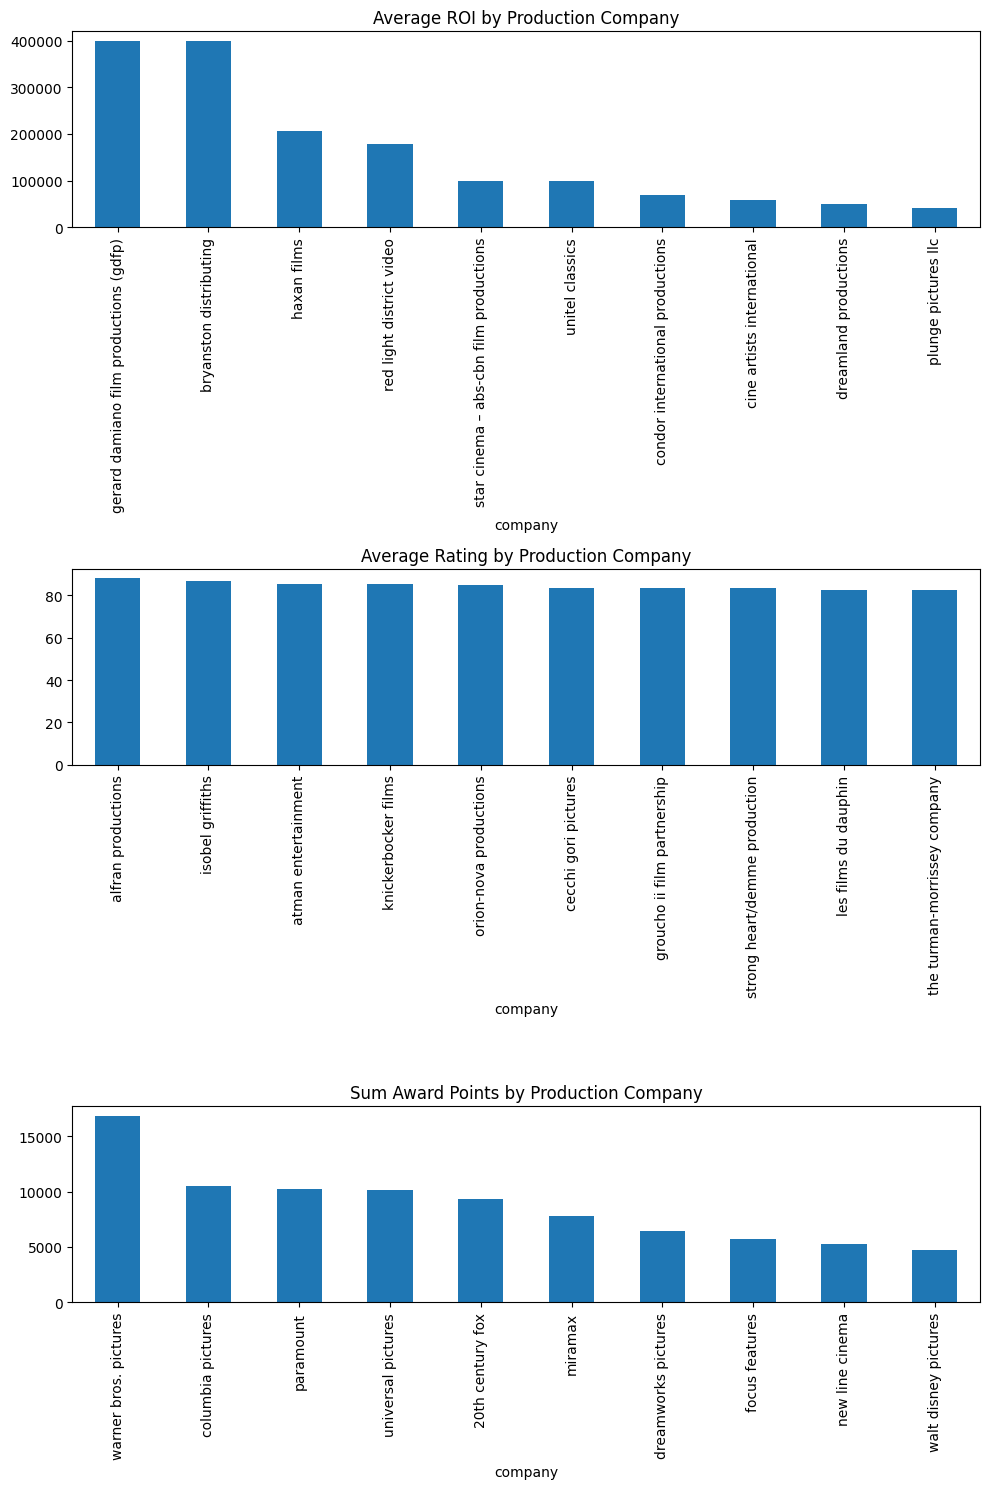

In [774]:
import pandas as pd
import matplotlib.pyplot as plt

companies_expanded = df['production_companies'].str.split(',', expand=True).stack()

roi_values = df.reindex(companies_expanded.index.get_level_values(0))['adjusted_ROI']
rating_values = df.reindex(companies_expanded.index.get_level_values(0))['average_rating']
award_values = df.reindex(companies_expanded.index.get_level_values(0))['award_points']

data = {
    'company': companies_expanded.values,
    'adjusted_ROI': roi_values.values,
    'average_rating': rating_values.values,
    'award_points': award_values.values
}
company_df = pd.DataFrame(data)

company_aggregations = company_df.groupby('company').agg({
    'award_points': 'sum',
    'adjusted_ROI': 'mean',
    'average_rating': 'mean'
})

fig, ax = plt.subplots(3, 1, figsize=(10, 15))
sorted_companies = company_aggregations.sort_values(by='adjusted_ROI', ascending=False)
sorted_companies['adjusted_ROI'].head(10).plot(kind='bar', ax=ax[0], title='Average ROI by Production Company')
sorted_companies = company_aggregations.sort_values(by='average_rating', ascending=False)
sorted_companies['average_rating'].head(10).plot(kind='bar', ax=ax[1], title='Average Rating by Production Company')
sorted_companies = company_aggregations.sort_values(by='award_points', ascending=False)
sorted_companies['award_points'].head(10).plot(kind='bar', ax=ax[2], title='Sum Award Points by Production Company')
plt.tight_layout()
plt.show()


In [775]:
lang_df = df.copy()
lang_df['spoken_languages'] = lang_df['spoken_languages'].str.split(',')
# Flatten the list of lists and count the occurrences of each country code
genre_counter = Counter(genre for genre_list in lang_df['spoken_languages'].dropna() for genre in genre_list)
# Convert the Counter object to a DataFrame for easier viewing and analysis
genre_frequencies = pd.DataFrame(genre_counter.items(), columns=['spoken_languages', 'frequency'])

genre_frequencies = genre_frequencies.sort_values(by='frequency', ascending=False).reset_index(drop=True)
genre_frequencies.head(10)

,spoken_languages,frequency
0,en,5115
1,fr,557
2,es,481
3,de,301
4,it,296
5,ru,264
6,ja,186
7,hi,130
8,zh,129
9,ar,93


And again the majority of movies in the datase uses english as spoken language

Let's compute the count of each item within the list for every row as new features:

In [776]:
df['num_spoken_languages'] = df['spoken_languages'].apply(lambda x: len(x.split(',')) if x else 0)
df['num_genres'] = df['genres'].apply(lambda x: len(x.split(',')) if x else 0)
df['num_production_companies'] = df['production_companies'].apply(lambda x: len(x.split(',')) if x else 0)
df['num_production_countries'] = df['production_countries'].apply(lambda x: len(x.split(',')) if x else 0)
df[['num_spoken_languages', 'num_genres', 'num_production_companies', 'num_production_countries']].describe()

,num_spoken_languages,num_genres,num_production_companies,num_production_countries
count,5735.00,5735.00,5735.00,5735.00
mean,1.49,2.59,3.04,1.39
std,0.94,1.03,2.21,0.82
min,0.00,1.00,0.00,0.00
25%,1.00,2.00,2.00,1.00
50%,1.00,3.00,3.00,1.00
75%,2.00,3.00,4.00,2.00
max,11.00,7.00,30.00,12.00


In [777]:
df[df['num_production_companies'] == 0]

,title,release_year,release_month,original_language,spoken_languages,genres,production_companies,production_countries,runtime,rated,tmdb_popularity,cast,crew,collection,adjusted_ROI,numerical_ROI_category,average_rating,numerical_rating_category,award_points,numerical_award_category,is_english,title_vector,overview_vector,tagline_vector,plot_vector,overview_sentiment,title_sentiment,tagline_sentiment,plot_sentiment,era,is_summer,is_autumn,genres_list,action,adventure,animation,comedy,crime,drama,family,fantasy,history,horror,music,mystery,romance,science fiction,thriller,war,western,num_spoken_languages,num_genres,num_production_companies,num_production_countries
7,dire straits: on the night,1993,5,en,en,music,,,94,unrated,1.08,"[{'name': 'mark knopfler', 'popularity': 6.818...","[{'job': 'director', 'name': 'mark knopfler', ...",False,900.00,1,63.71,0,0,0,1,0.16,0.12,0.00,0.05,0.08,0.00,0.00,0.00,1990-2000,0,0,[music],0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
35,antikiller d.k,2009,12,ru,ru,"mystery,action",,ru,91,unrated,1.39,"[{'name': 'gosha kutsenko', 'popularity': 5.12...","[{'job': 'writer', 'name': 'gosha kutsenko', '...",True,-14.36,0,63.58,0,2,0,0,0.00,0.04,0.00,0.15,0.06,0.00,0.00,-0.20,2000-2010,0,0,"[mystery, action]",1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,0,1
554,shabd,2005,2,hi,hi,"romance,thriller",,in,140,unrated,4.68,"[{'name': 'sanjay dutt', 'popularity': 5.713},...","[{'job': 'director', 'name': 'leena yadav', 'p...",False,24.00,0,63.50,0,2,0,0,-0.00,0.16,0.00,0.20,0.14,0.00,0.00,0.00,2000-2010,0,0,"[romance, thriller]",0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,2,0,1
578,aitraaz,2004,11,hi,hi,"thriller,romance",,in,159,unrated,5.39,"[{'name': 'akshay kumar', 'popularity': 13.507...","[{'job': 'producer', 'name': 'subhash ghai', '...",False,164.29,0,63.66,0,37,1,0,0.00,0.15,0.00,0.25,0.39,0.00,0.00,0.25,2000-2010,0,0,"[thriller, romance]",0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,2,0,1
714,9½ dates,2008,2,hu,hu,"comedy,romance",,hu,100,r,0.61,"[{'name': 'iván fenyő', 'popularity': 1.313}, ...","[{'job': 'director', 'name': 'tamás sas', 'pop...",False,-67.48,0,63.54,0,0,0,0,0.00,0.18,0.00,0.10,0.11,0.00,0.00,0.00,2000-2010,0,0,"[comedy, romance]",0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5800,bran nue dae,2009,8,en,en,"comedy,drama,romance",,au,82,pg-13,3.13,"[{'name': 'rocky mckenzie', 'popularity': 0.84...","[{'job': 'director of photography', 'name': 'a...",False,-2.68,0,63.58,0,26,1,1,-0.00,0.30,0.04,0.21,0.09,0.00,0.70,-0.18,2000-2010,0,0,"[comedy, drama, romance]",0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,3,0,1
5837,mungaru male,2006,12,kn,kn,"music,comedy,drama,romance",,in,143,unrated,2.27,"[{'name': 'anant nag', 'popularity': 2.167}, {...","[{'job': 'director', 'name': 'yogaraj bhat', '...",False,2263.64,1,64.12,0,0,0,0,0.00,0.11,0.00,0.15,0.07,0.00,0.00,0.45,2000-2010,0,0,"[music, comedy, drama, romance]",0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,4,0,1
5841,prince vladimir,2006,2,ru,ru,"animation,drama,history",,ru,78,unrated,1.67,"[{'name': 'irina bezrukova', 'popularity': 3.6...","[{'job': 'director', 'name': 'yuri kulakov', '...",False,7.99,0,63.67,0,1,0,0,0.01,0.21,0.00,0.24,0.01,0.00,0.00,-0.17,2000-2010,0,0,"[animation, drama, history]",0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,3,0,1
5928,the eylandt investigation,2008,11,de,de,mystery,,de,82,unrated,0.89,"[{'name': 'oliver kniffki', 'popularity': 0.6}...","[{'job': 'production design', 'name': 'markus ...",False,8141.60,1,63.66,0,9,0,0,0.16,0.20,0.17,0.20,0.13,0.00,0.00,0.13,2000-2010,0,0,[mystery],0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1


And add is_foreign for those countries that are not US:

In [778]:
df['is_foreign'] = df['production_countries'].apply(lambda x: 1 if 'us' not in x else 0)
df['is_foreign'].value_counts()

is_foreign
0    4635
1    1100
Name: count, dtype: int64

#### Collection

In [779]:
df['collection'] = df['collection'].astype(int)
df['collection'].value_counts()

collection
0    4373
1    1362
Name: count, dtype: int64

#### Crew

In [ ]:
#!TODO: add crew analysis 

In [780]:
import pandas as pd
import ast

df['director_popularity'] = 0
df['writer_popularity'] = 0
df['producer_popularity'] = 0
df['average_crew_popularity'] = 0
df['number_crew_members'] = 0

def update_popularity(row):
    director_popularity = 0
    writer_popularity = 0
    producer_popularity = 0
    total_popularity = 0
    num_directors = 0
    num_writers = 0
    num_producers = 0
    num_crew_members = len(row['crew'])
    
    for member in row['crew']:
        job = member.get('job', '')
        popularity = member.get('popularity', 0)
        total_popularity += popularity
        
        if job == 'director':
            director_popularity += popularity
            num_directors += 1
        elif job in ['writer', 'screenplay']:
            writer_popularity += popularity
            num_writers += 1
        elif job == 'producer':
            producer_popularity += popularity
            num_producers += 1
    
    # Average the popularity for directors, writers, and producers if there are multiple
    director_popularity /= max(num_directors, 1)
    writer_popularity /= max(num_writers, 1)
    producer_popularity /= max(num_producers, 1)
    
    # Compute the average popularity for all crew members
    average_crew_popularity = total_popularity / max(num_crew_members, 1)
    
    return pd.Series([director_popularity, writer_popularity, producer_popularity, average_crew_popularity, num_crew_members])

df[['director_popularity', 'writer_popularity', 'producer_popularity', 'average_crew_popularity', 'number_crew_members']] = df.apply(update_popularity, axis=1)
df[['director_popularity', 'writer_popularity', 'producer_popularity', 'average_crew_popularity', 'number_crew_members']].describe()

,director_popularity,writer_popularity,producer_popularity,average_crew_popularity,number_crew_members
count,5735.00,5735.00,5735.00,5735.00,5735.00
mean,6.03,3.94,3.34,1.86,62.31
std,7.40,5.07,4.57,1.34,70.84
min,0.60,0.00,0.00,0.60,1.00
25%,1.95,1.23,0.98,1.12,20.00
50%,3.78,2.31,1.80,1.53,37.00
75%,7.04,4.61,3.71,2.19,78.00
max,146.53,74.88,56.84,37.66,980.00


#### Cast

In [ ]:
#!TODO: add cast analysis 

In [781]:
import pandas as pd
import ast

df['average_cast_popularity'] = 0
df['number_cast_members'] = 0
df['top_cast_popularity'] = 0

def update_cast_popularity(row):
    total_popularity = 0
    top_cast_popularity = 0
    num_cast_members = len(row['cast'])
    
    # Sort the cast members by popularity, in descending order
    sorted_cast = sorted(row['cast'], key=lambda x: x.get('popularity', 0), reverse=True)
    
    for idx, member in enumerate(sorted_cast):
        popularity = member.get('popularity', 0)
        total_popularity += popularity
        
        # Sum the popularity of the top 4 cast members
        if idx < 4:
            top_cast_popularity += popularity
    
    # Compute the average popularity for all cast members
    average_cast_popularity = total_popularity / max(num_cast_members, 1)
    
    return pd.Series([average_cast_popularity, num_cast_members, top_cast_popularity])

df[['average_cast_popularity', 'number_cast_members', 'top_cast_popularity']] = df.apply(update_cast_popularity, axis=1)
df[['average_cast_popularity', 'number_cast_members', 'top_cast_popularity']].describe()

,average_cast_popularity,number_cast_members,top_cast_popularity
count,5735.00,5735.00,5735.00
mean,6.15,36.69,90.85
std,3.53,25.18,54.04
min,0.60,1.00,0.60
25%,3.70,19.00,50.49
50%,5.56,30.00,86.24
75%,7.92,47.00,122.33
max,44.34,348.00,489.51


#### Feature importance analysis

In [783]:
df.columns

Index(['title', 'release_year', 'release_month', 'original_language',
       'spoken_languages', 'genres', 'production_companies',
       'production_countries', 'runtime', 'rated', 'tmdb_popularity', 'cast',
       'crew', 'collection', 'adjusted_ROI', 'numerical_ROI_category',
       'average_rating', 'numerical_rating_category', 'award_points',
       'numerical_award_category', 'is_english', 'title_vector',
       'overview_vector', 'tagline_vector', 'plot_vector',
       'overview_sentiment', 'title_sentiment', 'tagline_sentiment',
       'plot_sentiment', 'era', 'is_summer', 'is_autumn', 'genres_list',
       'action', 'adventure', 'animation', 'comedy', 'crime', 'drama',
       'family', 'fantasy', 'history', 'horror', 'music', 'mystery', 'romance',
       'science fiction', 'thriller', 'war', 'western', 'num_spoken_languages',
       'num_genres', 'num_production_companies', 'num_production_countries',
       'is_foreign', 'director_popularity', 'writer_popularity',
       'pro

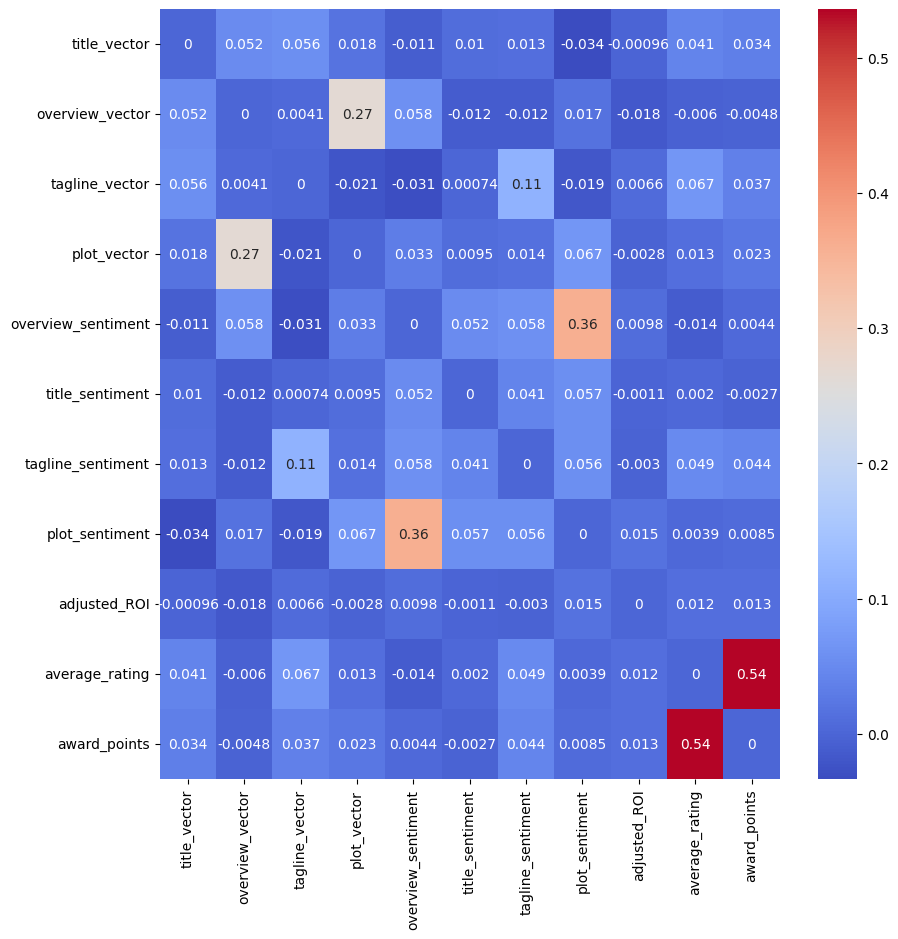

('average_rating', 'award_points')


In [786]:
corr_matrix = df[[ 'title_vector',
       'overview_vector', 'tagline_vector', 'plot_vector',
       'overview_sentiment', 'title_sentiment', 'tagline_sentiment',
       'plot_sentiment', 'adjusted_ROI', 'average_rating', 'award_points']].corr()

# Compute the correlation matrix
for i in range(corr_matrix.shape[0]):
    corr_matrix.iloc[i, i] = 0

plt.figure(figsize=(10, 10)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

max_corr_value = corr_matrix.abs().max().max()
result = corr_matrix.where(corr_matrix == max_corr_value).stack().index.tolist()[0]

print(result)

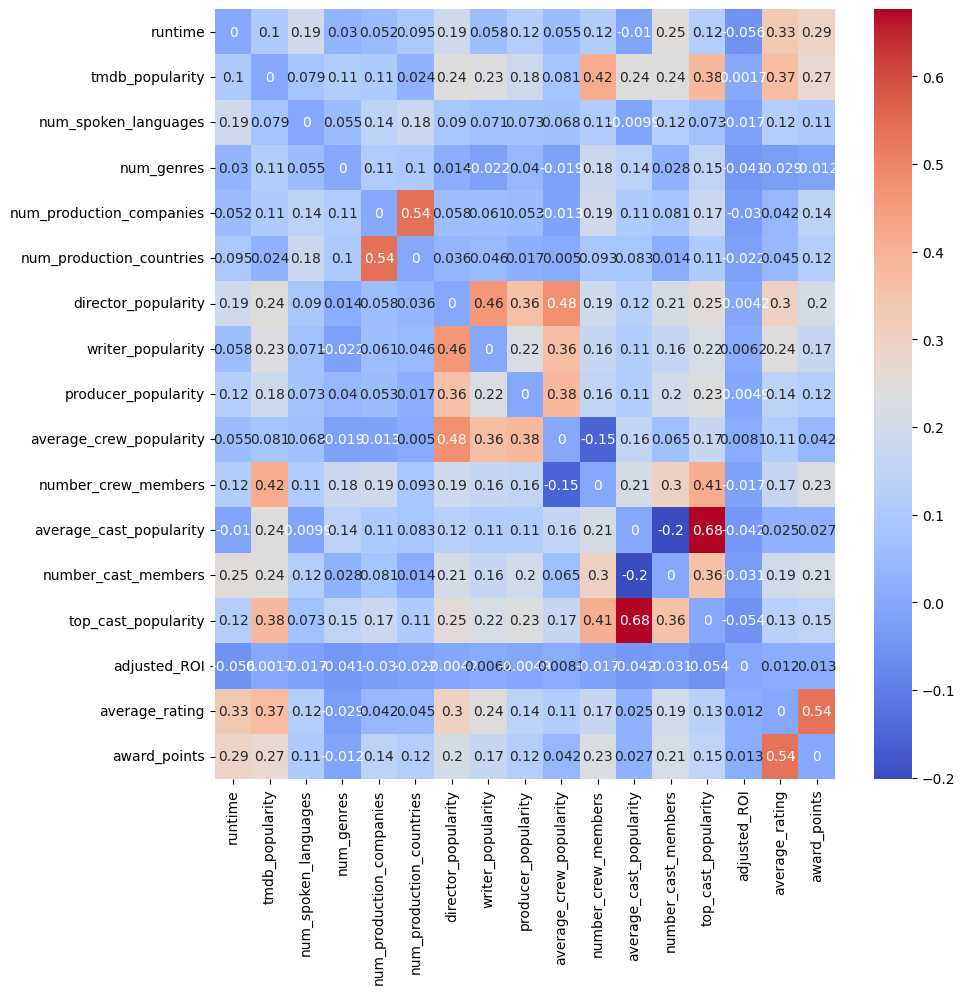

('average_cast_popularity', 'top_cast_popularity')


In [785]:
corr_matrix = df[[ "runtime", 'tmdb_popularity', 'num_spoken_languages',
       'num_genres', 'num_production_companies', 'num_production_countries','director_popularity', 'writer_popularity',
       'producer_popularity', 'average_crew_popularity', 'number_crew_members',
       'average_cast_popularity', 'number_cast_members',
       'top_cast_popularity', 'adjusted_ROI', 'average_rating', 'award_points']].corr()

# Compute the correlation matrix
for i in range(corr_matrix.shape[0]):
    corr_matrix.iloc[i, i] = 0

plt.figure(figsize=(10, 10)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

max_corr_value = corr_matrix.abs().max().max()
result = corr_matrix.where(corr_matrix == max_corr_value).stack().index.tolist()[0]

print(result)

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import scipy.stats as ss

# Assume df is your DataFrame, and 'categorical_feature' and 'label' are the column names
contingency_table = pd.crosstab(df['categorical_feature'], df['adjusted_ROI'])
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

print("Chi2 Stat:", chi2_stat)
print("P Value:", p_val)

def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_v_value = cramers_v(contingency_table)
print("Cramer's V:", cramers_v_value)
